In [1]:
import pandas as pd##-----------------------------------------

# Load the CSV filessss
file_path = 'final.feature.feed_to_other_models19.05.2024better pca +++.csv'
df = pd.read_csv(file_path)

# Ensure the date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Specify the date of interest
target_date = pd.to_datetime("2021-01-01")

# Split data based on the target date
train_data = df[df['Date'] < target_date]
test_data = df[df['Date'] > target_date]


print(df)
# Prepare features and target
#  
train_features = train_data.iloc[:, 2:11]  # Columns 3 to 11
train_target = train_data.iloc[:, 0]  # First column

test_features = test_data.iloc[:, 2:11]  # Columns 3 to 11
test_target = test_data.iloc[:, 0]  # First column
print(train_features)
# Print the shapes to verify
print("Train Features Shape:", train_features.shape)
print("Train Target Shape:", train_target.shape)
print("Test Features Shape:", test_features.shape)
print("Test Target Shape:", test_target.shape)



# Print first few values of the targets
print("First few values of train target:")
print(train_target.head())

print("First few values of test target:")
print(test_target.head())

# Optional: Save the train and test sets to CSV files
#train_data.to_csv('train_data.csv', index=False)
#test_data.to_csv('test_data.csv', index=False)


         close       Date       PC1       PC2       PC3       PC4       PC5  \
0        83.00 2019-10-01 -2.932811  2.731735  0.609189 -0.918217  0.892239   
1        81.00 2019-10-02 -2.681076  2.604170  0.034602 -0.835311  0.930077   
2        80.80 2019-10-03 -2.438407  2.379877 -0.203384 -0.197995  0.589412   
3        80.80 2019-10-04 -2.218340  2.261268 -0.304497  0.411508  0.092574   
4        81.80 2019-10-07 -1.962897  1.981664 -0.052326  0.809322 -0.293205   
...        ...        ...       ...       ...       ...       ...       ...   
1336805   0.66 2015-11-02  5.170522  5.740538  3.206039  0.927174 -0.026861   
1336806   0.55 2015-11-17  5.368219  5.476336  3.327282 -0.081613  0.695234   
1336807   0.63 2015-11-19  5.909610  5.133727  2.912999 -1.138360  1.608339   
1336808   0.63 2015-11-20  6.579879  4.689108  1.720395 -1.456960  1.678360   
1336809   0.45 2015-11-23  7.079015  4.229421  0.457032 -1.085693  1.224678   

              PC6       PC7  
0       -0.169926 -0.

In [1]:
import pandas as pd#### window of past 10 day close and 7 pca s 19.5.2024+++++++++++++++++++++++++++++++

# Function to create lagged features with a window sizeaa
def create_lagged_features(data, lag_days=10):
    df_lagged = data.copy()
    lagged_features = []

    for lag in range(1, lag_days + 1):
        lagged_features.append(df_lagged['close'].shift(lag).rename(f'close_lag_{lag}'))
        for col in df_lagged.columns[2:]:  # Assuming PCA components start from the 3rd column onwards
            lagged_features.append(df_lagged[col].shift(lag).rename(f'{col}_lag_{lag}'))

    # Combine lagged features
    lagged_df = pd.concat(lagged_features, axis=1)
    lagged_df['close'] = df_lagged['close']  # Add the target column to the DataFrame
    lagged_df.dropna(inplace=True)  # Drop rows with NaN values

    return lagged_df

# Load the CSV file
file_path = 'final.feature.feed_to_other_models19.05.2024better pca +++.csv'
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])

# Split data based on the target date
target_date = pd.to_datetime("2021-01-01")
train_data = df[df['Date'] < target_date]
test_data = df[df['Date'] > target_date]

# Create lagged features with a 5-day window size
train_data = create_lagged_features(train_data, lag_days=5)
test_data = create_lagged_features(test_data, lag_days=5)

# Prepare features and target
train_features = train_data.drop(columns=['close'])
train_target = train_data['close']
test_features = test_data.drop(columns=['close'])
test_target = test_data['close']

# Print the shapes to verify
print("Train Features Shape:", train_features.shape)
print("Train Target Shape:", train_target.shape)
print("Test Features Shape:", test_features.shape)
print("Test Target Shape:", test_target.shape)

# Print first few values of the targets
print("First few values of train target:")
print(train_target.head())

print("First few values of test target:")
print(test_target.head())

# Print all column names
print("Train Features Columns:")
print(train_features.columns.tolist())

print("Train Target Columns:")
print([train_target.name])

print("Test Features Columns:")
print(test_features.columns.tolist())

print("Test Target Columns:")
print([test_target.name])


Train Features Shape: (1203856, 40)
Train Target Shape: (1203856,)
Test Features Shape: (132944, 40)
Test Target Shape: (132944,)
First few values of train target:
5    82.4
6    83.4
7    81.6
8    82.0
9    81.0
Name: close, dtype: float64
First few values of test target:
316    63.4
317    63.2
318    60.6
319    62.0
320    62.2
Name: close, dtype: float64
Train Features Columns:
['close_lag_1', 'PC1_lag_1', 'PC2_lag_1', 'PC3_lag_1', 'PC4_lag_1', 'PC5_lag_1', 'PC6_lag_1', 'PC7_lag_1', 'close_lag_2', 'PC1_lag_2', 'PC2_lag_2', 'PC3_lag_2', 'PC4_lag_2', 'PC5_lag_2', 'PC6_lag_2', 'PC7_lag_2', 'close_lag_3', 'PC1_lag_3', 'PC2_lag_3', 'PC3_lag_3', 'PC4_lag_3', 'PC5_lag_3', 'PC6_lag_3', 'PC7_lag_3', 'close_lag_4', 'PC1_lag_4', 'PC2_lag_4', 'PC3_lag_4', 'PC4_lag_4', 'PC5_lag_4', 'PC6_lag_4', 'PC7_lag_4', 'close_lag_5', 'PC1_lag_5', 'PC2_lag_5', 'PC3_lag_5', 'PC4_lag_5', 'PC5_lag_5', 'PC6_lag_5', 'PC7_lag_5']
Train Target Columns:
['close']
Test Features Columns:
['close_lag_1', 'PC1_lag_1'

In [5]:
##  fttarnsformer without scaling  19.5.2024+++++++++++++++++++++

import pandas as pd
from pytorch_tabular import TabularModel
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig
from pytorch_tabular.models.ft_transformer import FTTransformerConfig

# Use a fraction of the training data
fraction = 0.1  # Adjust this fraction as needed
train_data_sampled = train_data.sample(frac=fraction, random_state=42)

# Prepare features and target for the sampled training data
train_features_sampled = train_data_sampled.drop(columns=['close'])
train_target_sampled = train_data_sampled['close']

# Combine features and target back into DataFrame for pytorch_tabular
train_df = pd.concat([train_target_sampled.reset_index(drop=True), train_features_sampled.reset_index(drop=True)], axis=1)
test_df = pd.concat([test_target.reset_index(drop=True), test_features.reset_index(drop=True)], axis=1)

# Configuration for the data
data_config = DataConfig(
    target=['close'],  # target column
    continuous_cols=train_features_sampled.columns.tolist(),  # feature columns
    categorical_cols=[]  # No categorical columns
)

# Configuration for the FT Transformer Model
model_config = FTTransformerConfig(
    task="regression",  # Regression task
    learning_rate=0.0001,
    head="LinearHead",
)

# Configuration for the training
trainer_config = TrainerConfig(
    auto_lr_find=True,  # Automatically find an optimal learning rate
    batch_size=64,
    max_epochs=10,  # More epochs for better training
    accelerator="auto",  # Automatically choose the best available acceleration (GPU if available)
    devices=-1  # Use all available devices
)

# Optimizer configuration
optimizer_config = OptimizerConfig()

# Initialize the Tabular Model
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config
)

# Fit the model
tabular_model.fit(train=train_df)

# Predict using the model
predictions = tabular_model.predict(test_df)

# Display the first few predictions
print(predictions.head())

# Print the first 200 predictions along with the corresponding test target values
print("First 200 Predictions and Respective Test Target Values:")
for i in range(200):
    print(f"Predicted: {predictions.iloc[i, 0]}, Actual: {test_target.iloc[i]}")

2024-05-19 14:51:48,438 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-05-19 14:51:48,537 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-05-19 14:51:48,581 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-05-19 14:51:48,747 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: FTTransformerModel

2024-05-19 14:51:48,775 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-05-19 14:51:49,053 - {pytorch_tabular.tabular_model:630} - INFO - Auto LR Find Started

c:\Users\a\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:639: Checkpoint directory C:\Users\a\Desktop\master thesis codez\saved_models exists and is not empty.
c:\Users\a\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\a\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

Trainer was signaled to stop but the required `min_epochs=1` or `min_steps=None` has not been met. Training will continue...
`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 9.120108393559096e-08
Restoring states from the checkpoint path at c:\Users\a\Desktop\master thesis codez\.lr_find_31eff08f-e455-4780-a60b-1a5fce35a7db.ckpt
Restored all states from the checkpoint at c:\Users\a\Desktop\master thesis codez\.lr_find_31eff08f-e455-4780-a60b-1a5fce35a7db.ckpt


2024-05-19 14:52:18,299 - {pytorch_tabular.tabular_model:643} - INFO - Suggested LR: 9.120108393559096e-08. For    
plot and detailed analysis, use `find_learning_rate` method.

2024-05-19 14:52:18,306 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │  271 K │
│ 1 │ _embedding_layer │ Embedding2dLayer      │  2.6 K │
│ 2 │ _head            │ LinearHead            │     33 │
│ 3 │ loss             │ MSELoss               │      0 │
└───┴──────────────────┴───────────────────────┴────────┘

Trainable params: 274 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 274 K                                                                                                
Total estimated model params size (MB): 1

Output()

`Trainer.fit` stopped: `max_epochs=10` reached.


2024-05-19 15:51:45,342 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-05-19 15:51:45,345 - {pytorch_tabular.tabular_model:1489} - INFO - Loading the best model

   close_prediction
0          0.737631
1          0.761956
2          0.733251
3          0.809641
4          0.930193
First 200 Predictions and Respective Test Target Values:
Predicted: 0.7376308441162109, Actual: 63.4
Predicted: 0.7619564533233643, Actual: 63.2
Predicted: 0.7332512140274048, Actual: 60.6
Predicted: 0.8096411228179932, Actual: 62.0
Predicted: 0.930193305015564, Actual: 62.2
Predicted: 0.947403609752655, Actual: 61.2
Predicted: 1.0280561447143555, Actual: 61.4
Predicted: 1.022257685661316, Actual: 62.0
Predicted: 1.048669457435608, Actual: 62.4
Predicted: 1.0752366781234741, Actual: 63.0
Predicted: 1.0544989109039307, Actual: 63.4
Predicted: 1.0238713026046753, Actual: 65.0
Predicted: 1.071973204612732, Actual: 65.6
Predicted: 1.0229331254959106, Actual: 64.4
Predicted: 0.9366875886917114, Actual: 67.6
Predicted: 0.8900975584983826, Actual: 69.6
Predicted: 0.8486559987068176, Actual: 73.0
Predicted: 0.718829870223999, Actual: 71.4
Predicted: 0.7601058483123779, Actual

c:\Users\a\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2024-05-19 21:44:39,181 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Seed set to 42


2024-05-19 21:44:39,525 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-05-19 21:44:39,569 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-05-19 21:44:39,742 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: FTTransformerModel

2024-05-19 21:44:39,770 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-05-19 21:44:39,789 - {pytorch_tabular.tabular_model:630} - INFO - Auto LR Find Started

c:\Users\a\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:639: Checkpoint directory C:\Users\a\Desktop\master thesis codez\saved_models exists and is not empty.
c:\Users\a\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\a\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

Trainer was signaled to stop but the required `min_epochs=1` or `min_steps=None` has not been met. Training will continue...
`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 8.317637711026709e-05
Restoring states from the checkpoint path at c:\Users\a\Desktop\master thesis codez\.lr_find_a234b42f-536e-437c-84d3-9b9be2867e60.ckpt
Restored all states from the checkpoint at c:\Users\a\Desktop\master thesis codez\.lr_find_a234b42f-536e-437c-84d3-9b9be2867e60.ckpt


2024-05-19 21:45:10,413 - {pytorch_tabular.tabular_model:643} - INFO - Suggested LR: 8.317637711026709e-05. For    
plot and detailed analysis, use `find_learning_rate` method.

2024-05-19 21:45:10,421 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │  271 K │
│ 1 │ _embedding_layer │ Embedding2dLayer      │  2.6 K │
│ 2 │ _head            │ LinearHead            │     33 │
│ 3 │ loss             │ MSELoss               │      0 │
└───┴──────────────────┴───────────────────────┴────────┘

Trainable params: 274 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 274 K                                                                                                
Total estimated model params size (MB): 1

Output()

2024-05-19 22:12:30,970 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-05-19 22:12:30,974 - {pytorch_tabular.tabular_model:1489} - INFO - Loading the best model

   close_prediction
0          0.010842
1          0.011149
2          0.009457
3          0.008798
4          0.008305
RMSE on scaled data: 0.011221724360353826
RMSE on real data: 54.31292198619687
First 200 Predictions and Respective Test Target Values:
Predicted: 52.49732971191406, Actual: 63.39999999999999
Predicted: 53.97881317138672, Actual: 63.20000000000001
Predicted: 45.79286193847656, Actual: 60.60000000000001
Predicted: 42.60041046142578, Actual: 62.00000000000001
Predicted: 40.214927673339844, Actual: 62.2
Predicted: 48.5814323425293, Actual: 61.2
Predicted: 59.500240325927734, Actual: 61.4
Predicted: 65.06353759765625, Actual: 62.00000000000001
Predicted: 60.5413818359375, Actual: 62.4
Predicted: 54.919578552246094, Actual: 63.0
Predicted: 47.58496856689453, Actual: 63.39999999999999
Predicted: 43.1984748840332, Actual: 65.0
Predicted: 46.63069534301758, Actual: 65.6
Predicted: 47.141639709472656, Actual: 64.4
Predicted: 51.31602096557617, Actual: 67.6
Predicted: 51.557861

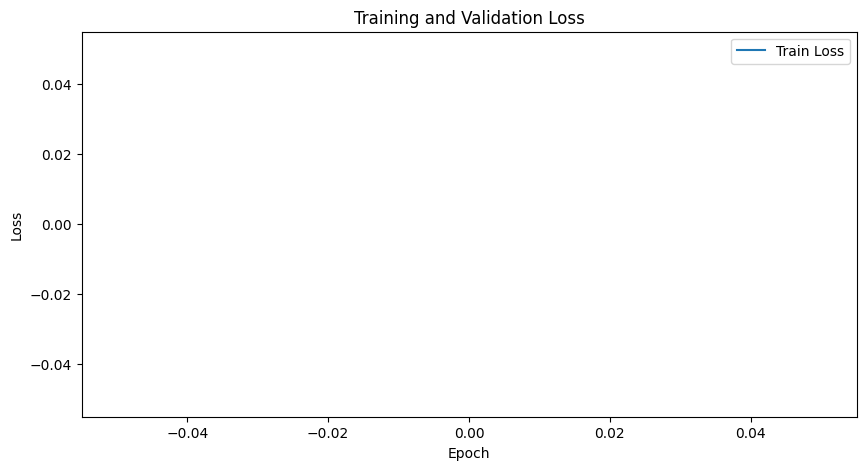

In [2]:
##### fttransformer all scaled +++ good results +++ 19.5.2024
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from pytorch_tabular import TabularModel
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig
from pytorch_tabular.models.ft_transformer import FTTransformerConfig
from pytorch_lightning.callbacks import Callback
from pytorch_lightning import Trainer

# Define a callback to log training and validation loss
class LossLogger(Callback):
    def __init__(self):
        super().__init__()
        self.train_losses = []
        self.val_losses = []

    def on_train_epoch_end(self, trainer, pl_module):
        if "train_loss" in trainer.callback_metrics:
            self.train_losses.append(trainer.callback_metrics["train_loss"].item())
        if "val_loss" in trainer.callback_metrics:
            self.val_losses.append(trainer.callback_metrics["val_loss"].item())

# Use a fraction of the training data
fraction = 0.1  # Adjust this fraction as needed
train_data_sampled = train_data.sample(frac=fraction, random_state=42)

# Initialize MinMaxScaler
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

# Scale the training features and target
train_features_sampled_scaled = pd.DataFrame(feature_scaler.fit_transform(train_data_sampled.drop(columns=['close'])), columns=train_data_sampled.drop(columns=['close']).columns)
train_target_sampled_scaled = target_scaler.fit_transform(train_data_sampled[['close']])

# Scale the test features and target
test_features_scaled = pd.DataFrame(feature_scaler.transform(test_features), columns=test_features.columns)
test_target_scaled = target_scaler.transform(test_target.values.reshape(-1, 1))

# Combine features and target back into DataFrame for pytorch_tabular
train_df = pd.concat([pd.DataFrame(train_target_sampled_scaled, columns=['close']), train_features_sampled_scaled.reset_index(drop=True)], axis=1)
test_df = pd.concat([pd.DataFrame(test_target_scaled, columns=['close']), test_features_scaled.reset_index(drop=True)], axis=1)

# Configuration for the data
data_config = DataConfig(
    target=['close'],  # target column
    continuous_cols=train_features_sampled_scaled.columns.tolist(),  # feature columns
    categorical_cols=[]  # No categorical columns
)

# Configuration for the FT Transformer Model
model_config = FTTransformerConfig(
    task="regression",  # Regression task
    learning_rate=0.001,
    head="LinearHead",
)

# Configuration for the training
trainer_config = TrainerConfig(
    auto_lr_find=True,  # Automatically find an optimal learning rate
    batch_size=64,
    max_epochs=10,  # More epochs for better training
    accelerator="auto",  # Automatically choose the best available acceleration (GPU if available)
    devices=1  # Use 1 device for training
)

# Optimizer configuration
optimizer_config = OptimizerConfig()

# Initialize the Tabular Model
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config
)

# Initialize the Trainer with LossLogger callback
loss_logger = LossLogger()
trainer = Trainer(
    max_epochs=trainer_config.max_epochs,
    callbacks=[loss_logger],
    accelerator=trainer_config.accelerator,
    devices=trainer_config.devices
)

# Fit the model
tabular_model.fit(train=train_df)

# Predict using the model
predictions_scaled = tabular_model.predict(test_df)

# Inverse scale the predictions and the actual test target for comparison
predictions_inverse = target_scaler.inverse_transform(predictions_scaled)
test_target_inverse = target_scaler.inverse_transform(test_target_scaled)

# Display the first few predictions
print(predictions_scaled.head())

# Calculate RMSE for scaled data
rmse_scaled = np.sqrt(mean_squared_error(test_target_scaled, predictions_scaled))
print(f"RMSE on scaled data: {rmse_scaled}")

# Calculate RMSE for inverse-scaled (real) data
rmse_real = np.sqrt(mean_squared_error(test_target_inverse, predictions_inverse))
print(f"RMSE on real data: {rmse_real}")

# Print the first 200 predictions along with the corresponding test target values
print("First 200 Predictions and Respective Test Target Values:")
for i in range(200):
    print(f"Predicted: {predictions_inverse[i, 0]}, Actual: {test_target_inverse[i, 0]}")

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(loss_logger.train_losses, label='Train Loss')
if loss_logger.val_losses:
    plt.plot(loss_logger.val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


2024-05-20 09:33:47,349 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Seed set to 42


2024-05-20 09:33:47,390 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-05-20 09:33:47,396 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-05-20 09:33:47,474 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabNetModel

2024-05-20 09:33:47,522 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-05-20 09:33:47,542 - {pytorch_tabular.tabular_model:630} - INFO - Auto LR Find Started

c:\Users\a\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:639: Checkpoint directory C:\Users\a\Desktop\master thesis codez\saved_models exists and is not empty.
c:\Users\a\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\a\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

Trainer was signaled to stop but the required `min_epochs=1` or `min_steps=None` has not been met. Training will continue...
`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 7.585775750291837e-08
Restoring states from the checkpoint path at c:\Users\a\Desktop\master thesis codez\.lr_find_0191a49b-53c4-4f8c-ba24-e3abfa0c550a.ckpt
Restored all states from the checkpoint at c:\Users\a\Desktop\master thesis codez\.lr_find_0191a49b-53c4-4f8c-ba24-e3abfa0c550a.ckpt


2024-05-20 09:33:50,362 - {pytorch_tabular.tabular_model:643} - INFO - Suggested LR: 7.585775750291837e-08. For    
plot and detailed analysis, use `find_learning_rate` method.

2024-05-20 09:33:50,370 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  8.3 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 8.3 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 8.3 K                                                                                                
Total estimated model params size (MB): 0

Output()

`Trainer.fit` stopped: `max_epochs=4` reached.


2024-05-20 09:34:38,177 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-05-20 09:34:38,181 - {pytorch_tabular.tabular_model:1489} - INFO - Loading the best model

RMSE on real data: 141.7548469787344
First 200 Predictions and Respective Test Target Values:
Predicted: 0.13628776371479034, Actual: 63.4
Predicted: 0.0786159560084343, Actual: 63.2
Predicted: 0.7968277931213379, Actual: 60.6
Predicted: 0.6771222352981567, Actual: 62.0
Predicted: 0.14971214532852173, Actual: 62.2
Predicted: 0.935905396938324, Actual: 61.2
Predicted: 0.48443493247032166, Actual: 61.4
Predicted: 0.6529932022094727, Actual: 62.0
Predicted: 0.04522014781832695, Actual: 62.4
Predicted: 0.17199485003948212, Actual: 63.0
Predicted: 0.18223817646503448, Actual: 63.4
Predicted: 0.13876184821128845, Actual: 65.0
Predicted: 0.00614614924415946, Actual: 65.6
Predicted: 0.01930490881204605, Actual: 64.4
Predicted: -0.061670705676078796, Actual: 67.6
Predicted: -0.036117419600486755, Actual: 69.6
Predicted: -0.003747057169675827, Actual: 73.0
Predicted: 0.06852258741855621, Actual: 71.4
Predicted: 0.2526174485683441, Actual: 69.2
Predicted: 0.201589435338974, Actual: 68.8
Predicted

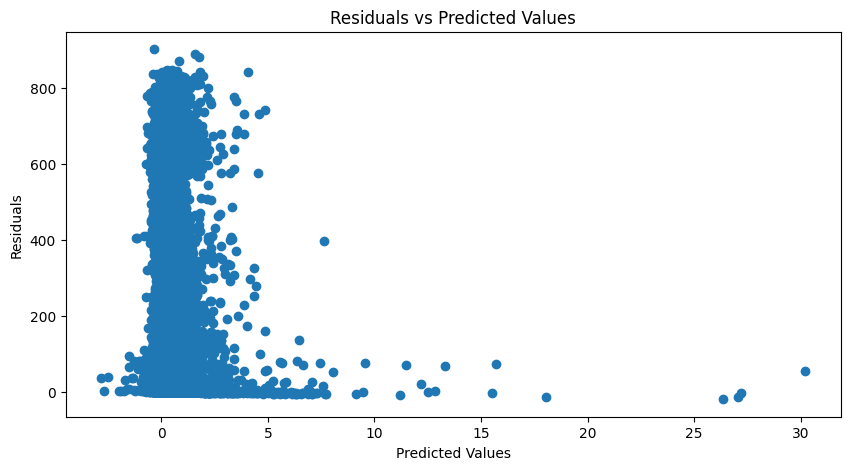

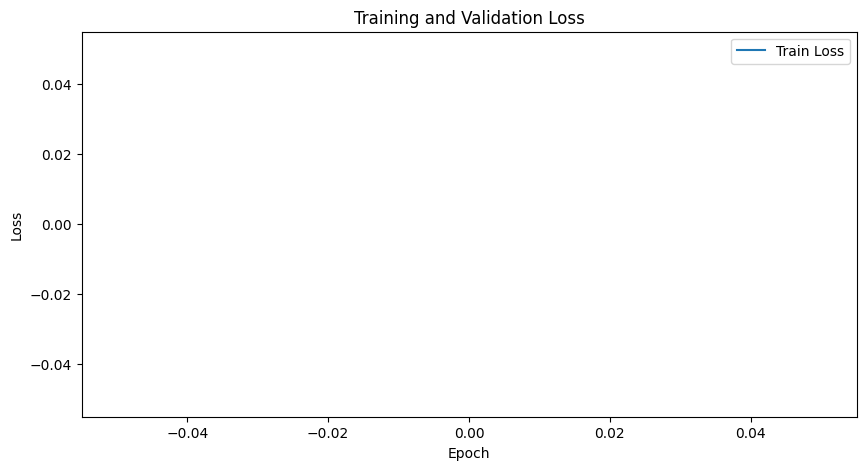

In [3]:
### tabnet unscaled residual mide loss o nemide 20.50.2024 ba -------pytorch tabular------ be dard nemikhore------------------------------------ pytorch tabnet behtare +++
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from pytorch_tabular import TabularModel
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig
from pytorch_tabular.models.tabnet import TabNetModelConfig
from pytorch_lightning.callbacks import Callback
from pytorch_lightning import Trainer

# Define a callback to log training and validation loss
class LossLogger(Callback):
    def __init__(self):
        super().__init__()
        self.train_losses = []
        self.val_losses = []

    def on_train_epoch_end(self, trainer, pl_module):
        if "train_loss" in trainer.callback_metrics:
            self.train_losses.append(trainer.callback_metrics["train_loss"].item())
        if "val_loss" in trainer.callback_metrics:
            self.val_losses.append(trainer.callback_metrics["val_loss"].item())

# Assuming train_data, test_data, train_features, train_target, test_features, test_target are already prepared

# Use a fraction of the training data
fraction = 0.01  # Adjust this fraction as needed
train_data_sampled = train_data.sample(frac=fraction, random_state=42)

# Prepare features and target for the sampled training data
train_features_sampled = train_data_sampled.drop(columns=['close'])
train_target_sampled = train_data_sampled['close']

# Combine features and target back into DataFrame for pytorch_tabular
train_df = pd.concat([train_target_sampled.reset_index(drop=True), train_features_sampled.reset_index(drop=True)], axis=1)
test_df = pd.concat([test_target.reset_index(drop=True), test_features.reset_index(drop=True)], axis=1)

# Configuration for the data
data_config = DataConfig(
    target=['close'],  # target column
    continuous_cols=train_features_sampled.columns.tolist(),  # feature columns
    categorical_cols=[]  # No categorical columns
)

# Configuration for the TabNet Model
model_config = TabNetModelConfig(
    task="regression",  # Regression task
    learning_rate=0.001,
    n_d=8,  # Adjust parameters as needed
    n_a=8,  # Adjust parameters as needed
)

# Configuration for the training
trainer_config = TrainerConfig(
    auto_lr_find=True,  # Automatically find an optimal learning rate
    batch_size=64,
    max_epochs=4,  # More epochs for better training
    accelerator="auto",  # Automatically choose the best available acceleration (GPU if available)
    devices=1  # Use 1 device for training
)

# Optimizer configuration
optimizer_config = OptimizerConfig()

# Initialize the Tabular Model
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config
)

# Initialize the Trainer with LossLogger callback
loss_logger = LossLogger()
trainer = Trainer(
    max_epochs=trainer_config.max_epochs,
    callbacks=[loss_logger],
    accelerator=trainer_config.accelerator,
    devices=trainer_config.devices
)

# Fit the model
tabular_model.fit(train=train_df)

# Predict using the model
predictions = tabular_model.predict(test_df)

# Ensure predictions and test_target have the same length
predictions = predictions[:len(test_target)]

# Calculate RMSE for real data
rmse_real = np.sqrt(mean_squared_error(test_target, predictions))
print(f"RMSE on real data: {rmse_real}")

# Print the first 200 predictions along with the corresponding test target values
print("First 200 Predictions and Respective Test Target Values:")
for i in range(200):
    print(f"Predicted: {predictions.iloc[i, 0]}, Actual: {test_target.iloc[i]}")

# Calculate residuals
residuals = test_target.values.flatten() - predictions.iloc[:, 0].values.flatten()

# Plot residuals
plt.figure(figsize=(10, 5))
plt.scatter(predictions.iloc[:, 0], residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(loss_logger.train_losses, label='Train Loss')
if len(loss_logger.val_losses) > 0:
    plt.plot(loss_logger.val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


c:\Users\a\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1888.2518| val_0_mse: 4573.23671|  0:05:53s
epoch 1  | loss: 1029.04062| val_0_mse: 4173.73698|  0:12:05s
epoch 2  | loss: 894.88287| val_0_mse: 4317.06762|  0:19:10s
epoch 3  | loss: 892.63702| val_0_mse: 4391.6996|  0:26:42s
epoch 4  | loss: 790.09137| val_0_mse: 3617.526|  0:34:24s
Stop training because you reached max_epochs = 5 with best_epoch = 4 and best_val_0_mse = 3617.526


c:\Users\a\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


RMSE on real data: 60.145872691196146
First 200 Predictions and Respective Test Target Values:
Predicted: [59.966705], Actual: [63.4]
Predicted: [58.062088], Actual: [63.2]
Predicted: [57.991444], Actual: [60.6]
Predicted: [55.932686], Actual: [62.]
Predicted: [56.931408], Actual: [62.2]
Predicted: [56.888077], Actual: [61.2]
Predicted: [56.349045], Actual: [61.4]
Predicted: [56.493095], Actual: [62.]
Predicted: [56.55625], Actual: [62.4]
Predicted: [56.902504], Actual: [63.]
Predicted: [57.37625], Actual: [63.4]
Predicted: [56.81474], Actual: [65.]
Predicted: [57.213905], Actual: [65.6]
Predicted: [57.66617], Actual: [64.4]
Predicted: [57.39911], Actual: [67.6]
Predicted: [60.377514], Actual: [69.6]
Predicted: [62.92883], Actual: [73.]
Predicted: [65.267975], Actual: [71.4]
Predicted: [64.72677], Actual: [69.2]
Predicted: [62.471172], Actual: [68.8]
Predicted: [61.524002], Actual: [68.6]
Predicted: [61.441345], Actual: [67.8]
Predicted: [60.87985], Actual: [68.4]
Predicted: [61.20065]

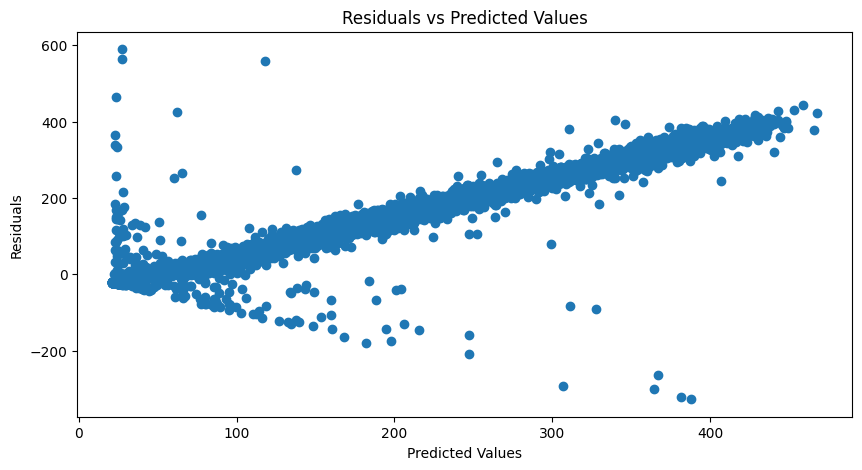

History: {'loss': [1888.2518007892697, 1029.0406218811656, 894.8828682134981, 892.6370221421492, 790.0913734196628], 'lr': [0.02, 0.02, 0.02, 0.02, 0.02], 'val_0_mse': [4573.236713374425, 4173.73697708368, 4317.067618567932, 4391.699598812362, 3617.526001785574]}


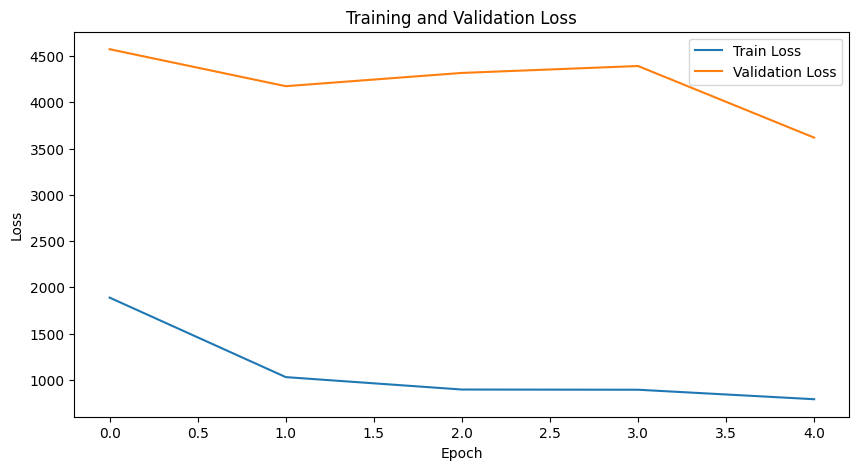

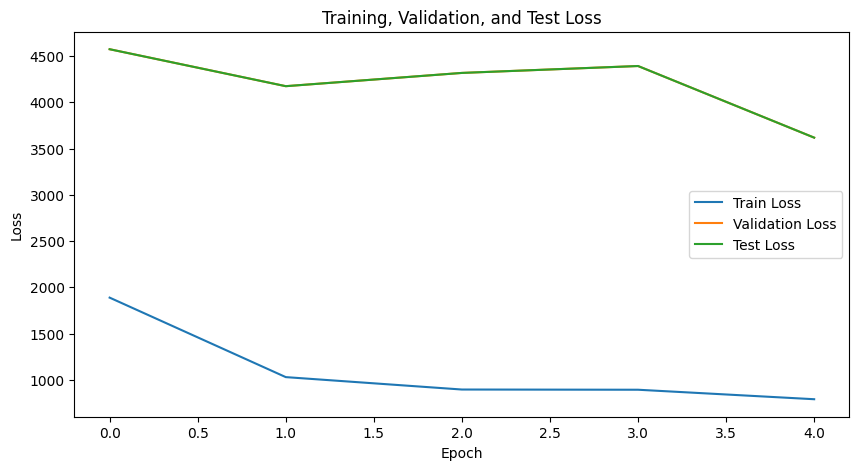

In [24]:
### tabnet pytorhc tabnet ++ unscale plot good result good ++++ 20.05.2024+++++++++++++++++++++++++++++++++


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.metrics import mean_squared_error

# Use a fraction of the training data
fraction = 1  # Adjust this fraction as needed
train_data_sampled = train_data.sample(frac=fraction, random_state=42)

# Prepare features and target for the sampled training data
train_features_sampled = train_data_sampled.drop(columns=['close'])
train_target_sampled = train_data_sampled['close']

# Reshape the targets to 2D
train_target_sampled = train_target_sampled.values.reshape(-1, 1)
test_target_reshaped = test_target.reshape(-1, 1)

# Train the TabNet model
tabnet = TabNetRegressor()

tabnet.fit(
    X_train=train_features_sampled.values, y_train=train_target_sampled,
    eval_set=[(test_features.values, test_target_reshaped)],
    max_epochs=5,
    patience=10,
    batch_size=64,
    virtual_batch_size=64
)

# Predict using the model
predictions = tabnet.predict(test_features.values)

# Calculate RMSE for real data
rmse_real = np.sqrt(mean_squared_error(test_target_reshaped, predictions))
print(f"RMSE on real data: {rmse_real}")

# Print the first 200 predictions along with the corresponding test target values
print("First 200 Predictions and Respective Test Target Values:")
for i in range(200):
    print(f"Predicted: {predictions[i]}, Actual: {test_target[i]}")

# Calculate residuals
residuals = test_target_reshaped - predictions

# Plot residuals
plt.figure(figsize=(10, 5))
plt.scatter(predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Inspect history
print("History:", tabnet.history)

# Extract training and validation losses
train_losses = tabnet.history['loss']
val_losses = tabnet.history['val_0_mse']

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Extract test loss from validation loss if you want to treat it as test loss
test_losses = val_losses

# Plot the training, validation, and test loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()
plt.show()


c:\Users\a\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.00067 | val_0_mse: 0.00017 |  0:06:36s
epoch 1  | loss: 0.0001  | val_0_mse: 0.00039 |  0:13:51s
epoch 2  | loss: 9e-05   | val_0_mse: 0.00603 |  0:20:01s
epoch 3  | loss: 9e-05   | val_0_mse: 0.00026 |  0:25:37s
epoch 4  | loss: 9e-05   | val_0_mse: 0.00024 |  0:31:18s
Stop training because you reached max_epochs = 5 with best_epoch = 0 and best_val_0_mse = 0.00017


c:\Users\a\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


RMSE on real data: 64.49406760497108
First 200 Predictions and Respective Test Target Values:
Predicted: 45.29263687133789, Actual: 63.4
Predicted: 49.00389099121094, Actual: 63.2
Predicted: 55.994293212890625, Actual: 60.6
Predicted: 61.45475387573242, Actual: 62.0
Predicted: 69.20033264160156, Actual: 62.2
Predicted: 69.44145965576172, Actual: 61.2
Predicted: 71.69102478027344, Actual: 61.4
Predicted: 70.1304702758789, Actual: 62.0
Predicted: 70.41878509521484, Actual: 62.4
Predicted: 67.06404113769531, Actual: 63.0
Predicted: 63.28717803955078, Actual: 63.4
Predicted: 56.63713073730469, Actual: 65.0
Predicted: 47.38895034790039, Actual: 65.6
Predicted: 40.31888198852539, Actual: 64.4
Predicted: 34.99996566772461, Actual: 67.6
Predicted: 31.761062622070312, Actual: 69.6
Predicted: 31.20584487915039, Actual: 73.0
Predicted: 32.56767654418945, Actual: 71.4
Predicted: 35.72320556640625, Actual: 69.2
Predicted: 39.832794189453125, Actual: 68.8
Predicted: 45.29323196411133, Actual: 68.6
P

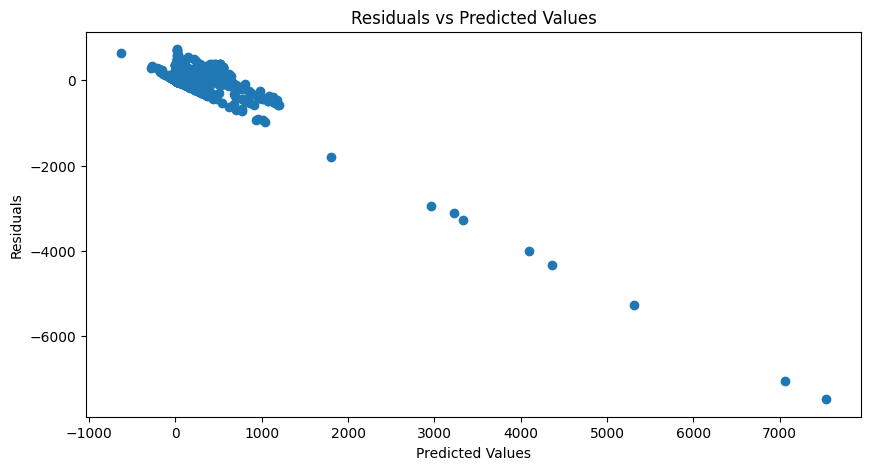

History: {'loss': [0.0006734571394683621, 0.00010148492226278606, 9.427959931719988e-05, 9.092123446460574e-05, 9.049642928104745e-05], 'lr': [0.02, 0.02, 0.02, 0.02, 0.02], 'val_0_mse': [0.0001732411031858092, 0.0003904882782931014, 0.006025094410593459, 0.00025907616648751134, 0.00023941925358636772]}


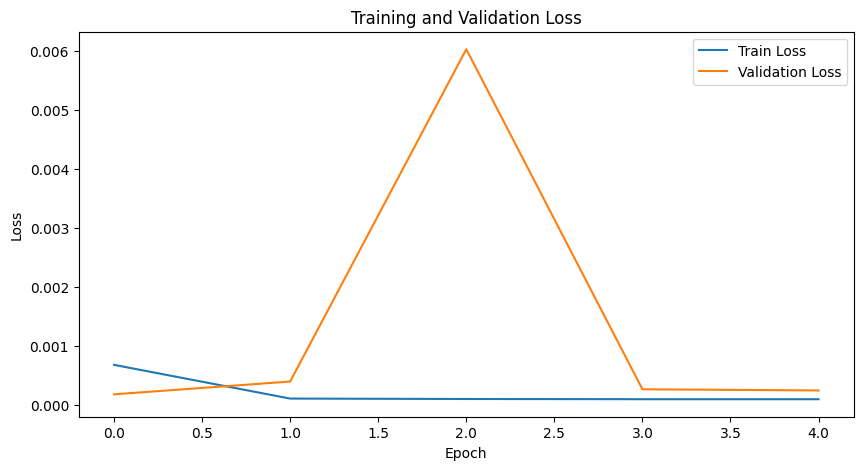

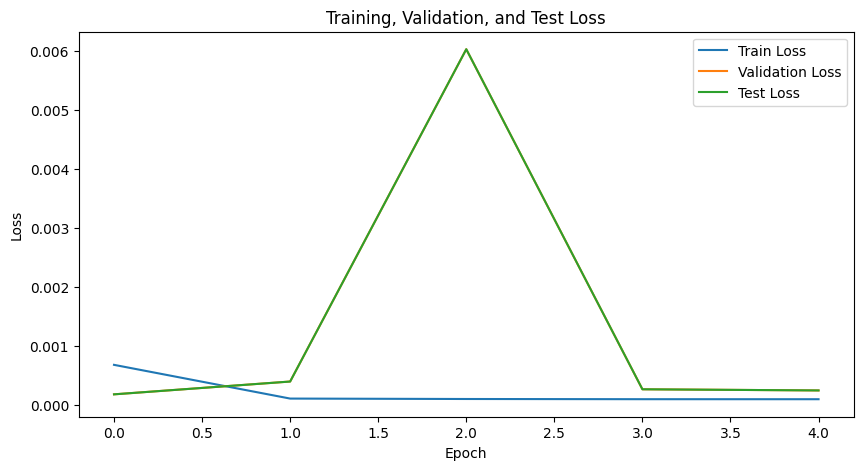

In [26]:
##tabnet scaled test 20.05.2024  pytorch tabnet +++ plot kamel mashty +++++++20.5.2024


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Use a fraction of the training data
fraction = 1 # Adjust this fraction as needed
train_data_sampled = train_data.sample(frac=fraction, random_state=42)

# Prepare features and target for the sampled training data
train_features_sampled = train_data_sampled.drop(columns=['close'])
train_target_sampled = train_data_sampled['close']
test_features = test_data.drop(columns=['close'])
test_target = test_data['close']

# Scaling the features and targets using MinMaxScaler
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

train_features_scaled = scaler_features.fit_transform(train_features_sampled)
test_features_scaled = scaler_features.transform(test_features)

train_target_scaled = scaler_target.fit_transform(train_target_sampled.values.reshape(-1, 1))
test_target_scaled = scaler_target.transform(test_target.values.reshape(-1, 1))

# Train the TabNet model
tabnet = TabNetRegressor()

tabnet.fit(
    X_train=train_features_scaled, y_train=train_target_scaled,
    eval_set=[(test_features_scaled, test_target_scaled)],
    max_epochs=5,
    patience=10,
    batch_size=64,
    virtual_batch_size=64
)

# Predict using the model
predictions_scaled = tabnet.predict(test_features_scaled)

# Inverse transform the predictions to original scale
predictions = scaler_target.inverse_transform(predictions_scaled)

# Calculate RMSE for real data
rmse_real = np.sqrt(mean_squared_error(test_target.values.reshape(-1, 1), predictions))
print(f"RMSE on real data: {rmse_real}")

# Print the first 200 predictions along with the corresponding test target values
print("First 200 Predictions and Respective Test Target Values:")
for i in range(200):
    print(f"Predicted: {predictions[i][0]}, Actual: {test_target.values[i]}")

# Calculate residuals
residuals = test_target.values.reshape(-1, 1) - predictions

# Plot residuals
plt.figure(figsize=(10, 5))
plt.scatter(predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Inspect history
print("History:", tabnet.history)

# Extract training and validation losses
train_losses = tabnet.history['loss']
val_losses = tabnet.history['val_0_mse']

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Extract test loss from validation loss if you want to treat it as test loss
test_losses = val_losses

# Plot the training, validation, and test loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()
plt.show()


Subset Train Features Shape: (12038, 40)
Subset Train Target Shape: (12038,)
Epoch [1/5], Train Loss: 23213.2889, Validation Loss: 9260.1388
Epoch [2/5], Train Loss: 13339.6223, Validation Loss: 34165.6111
Epoch [3/5], Train Loss: 8249.1691, Validation Loss: 4612.0554
Epoch [4/5], Train Loss: 5597.1045, Validation Loss: 4341.1880
Epoch [5/5], Train Loss: 4598.4628, Validation Loss: 1515.9300
RMSE on test data: 38.941162109375
First 200 Predictions and Respective Test Target Values:
Predicted: 83.93830108642578, Actual: 63.400001525878906
Predicted: 80.9446029663086, Actual: 63.20000076293945
Predicted: 80.74597930908203, Actual: 60.599998474121094
Predicted: 74.25760650634766, Actual: 62.0
Predicted: 69.16663360595703, Actual: 62.20000076293945
Predicted: 68.97798156738281, Actual: 61.20000076293945
Predicted: 67.71261596679688, Actual: 61.400001525878906
Predicted: 68.57868194580078, Actual: 62.0
Predicted: 73.25564575195312, Actual: 62.400001525878906
Predicted: 77.51920318603516, Ac

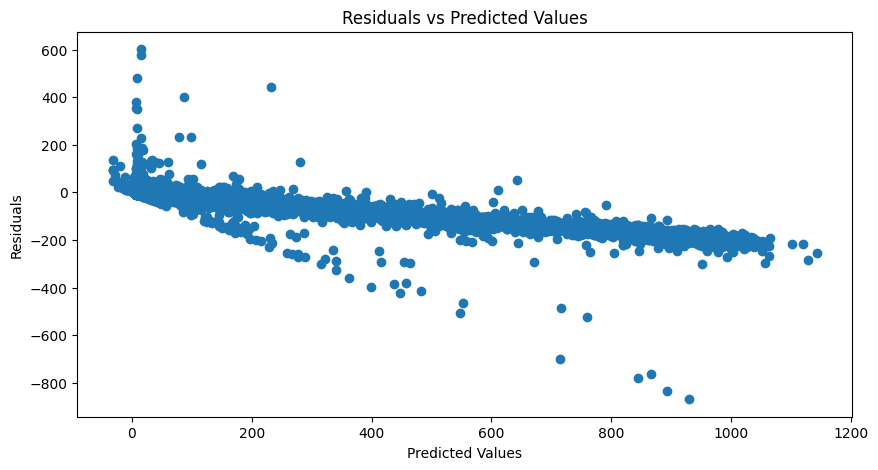

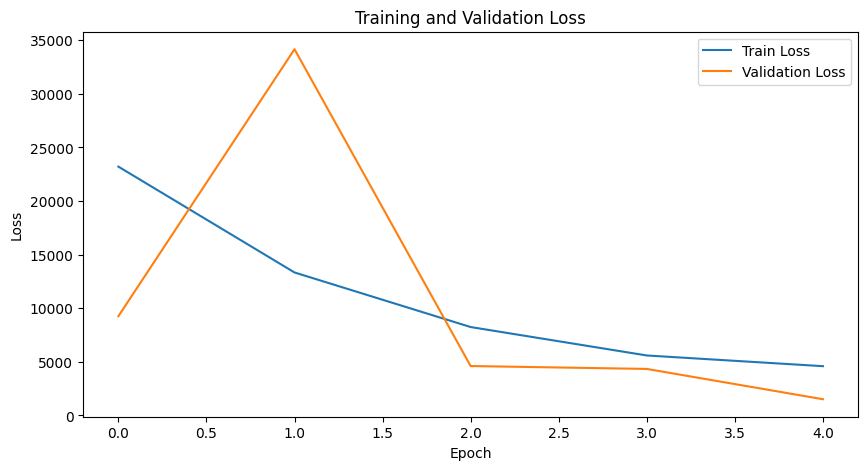

In [6]:
### resnet unscale 21.05.2024  +++++++++++++

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error



# Use a subset of the training data for faster training
subset_fraction = 0.01  # Adjust this fraction as needed
train_features_subset, _, train_target_subset, _ = train_test_split(
    train_features, train_target, train_size=subset_fraction, random_state=42
)

print("Subset Train Features Shape:", train_features_subset.shape)
print("Subset Train Target Shape:", train_target_subset.shape)

# Prepare the data loaders
batch_size = 64

train_dataset = TensorDataset(torch.tensor(train_features_subset.values, dtype=torch.float32), 
                              torch.tensor(train_target_subset.values, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(torch.tensor(test_features.values, dtype=torch.float32), 
                             torch.tensor(test_target.values, dtype=torch.float32))
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class ResNet1D(nn.Module):
    def __init__(self, in_channels, out_channels, layers):
        super(ResNet1D, self).__init__()
        self.conv1 = nn.Conv1d(in_channels, 64, kernel_size=7, stride=2, padding=3)
        self.bn1 = nn.BatchNorm1d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)
        
        self.layer1 = self._make_layer(64, 64, layers[0])
        self.layer2 = self._make_layer(64, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(128, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(256, 512, layers[3], stride=2)
        
        self.avgpool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(512, out_channels)
    
    def _make_layer(self, in_channels, out_channels, blocks, stride=1):
        layers = []
        layers.append(self._make_block(in_channels, out_channels, stride))
        for _ in range(1, blocks):
            layers.append(self._make_block(out_channels, out_channels))
        return nn.Sequential(*layers)
    
    def _make_block(self, in_channels, out_channels, stride=1):
        return nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm1d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv1d(out_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm1d(out_channels)
        )
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# Define the model, loss function, and optimizer
in_channels = 1  # Set to 1 because we add a channel dimension
out_channels = 1
layers = [2, 2, 2, 2]  # ResNet-18 structure


model = ResNet1D(in_channels, out_channels, layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model

num_epochs = 5
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for inputs, targets in train_loader:
        inputs = inputs.unsqueeze(1)  # Add channel dimension for 1D CNN
        targets = targets.view(-1, 1)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        running_train_loss += loss.item()
    
    train_loss = running_train_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Validation
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs = inputs.unsqueeze(1)
            targets = targets.view(-1, 1)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_val_loss += loss.item()
    
    val_loss = running_val_loss / len(test_loader)
    val_losses.append(val_loss)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    test_predictions = []
    test_targets = []
    for inputs, targets in test_loader:
        inputs = inputs.unsqueeze(1)
        outputs = model(inputs)
        test_predictions.extend(outputs.numpy())
        test_targets.extend(targets.numpy())

# Calculate RMSE for the test set
rmse_test = np.sqrt(mean_squared_error(test_targets, test_predictions))
print(f"RMSE on test data: {rmse_test}")

# Plot the first 200 predictions along with the corresponding test target values
print("First 200 Predictions and Respective Test Target Values:")
for i in range(200):
    print(f"Predicted: {test_predictions[i][0]}, Actual: {test_targets[i]}")

# Plot residuals
residuals = np.array(test_targets).reshape(-1, 1) - np.array(test_predictions).reshape(-1, 1)
plt.figure(figsize=(10, 5))
plt.scatter(test_predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()



Subset Train Features Shape: (12038, 40)
Subset Train Target Shape: (12038, 1)
Epoch [1/5], Train Loss: 0.4416, Validation Loss: 0.0008
Epoch [2/5], Train Loss: 0.0004, Validation Loss: 0.0004
Epoch [3/5], Train Loss: 0.0003, Validation Loss: 0.0001
Epoch [4/5], Train Loss: 0.0003, Validation Loss: 0.0002
Epoch [5/5], Train Loss: 0.0002, Validation Loss: 0.0001
RMSE on test data (scaled): 0.010248374193906784
RMSE on test data (original scale): 50.21682827984176
First 200 Predictions and Respective Test Target Values:
Predicted: 0.0032368265092372894, Actual: 0.012934746220707893
Predicted: 0.013541854918003082, Actual: 0.012893930077552795
Predicted: 0.017693817615509033, Actual: 0.012363315559923649
Predicted: 0.019007455557584763, Actual: 0.012649031355977058
Predicted: 0.020910605788230896, Actual: 0.012689847499132156
Predicted: 0.02271972969174385, Actual: 0.012485764920711517
Predicted: 0.017490170896053314, Actual: 0.01252658199518919
Predicted: 0.01277254894375801, Actual: 0.0

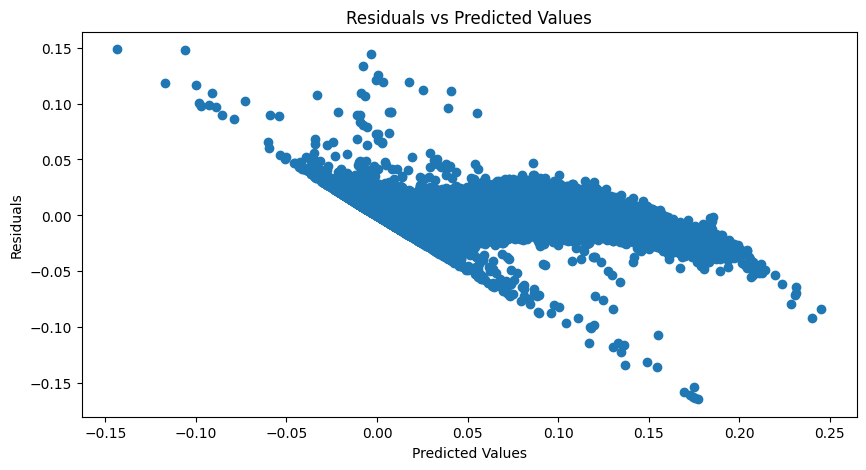

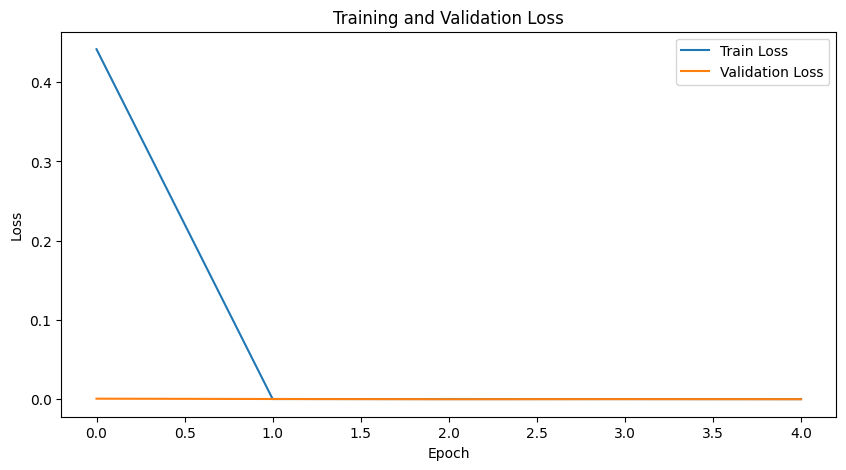

In [11]:
### resnet all scaled 21.05.2024  


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


# Scale the features and target using MinMaxScaler
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

train_features_scaled = scaler_features.fit_transform(train_features)
test_features_scaled = scaler_features.transform(test_features)

train_target_scaled = scaler_target.fit_transform(train_target.values.reshape(-1, 1))
test_target_scaled = scaler_target.transform(test_target.values.reshape(-1, 1))

# Use a subset of the training data for faster training
subset_fraction = 0.01  # Adjust this fraction as needed
train_features_subset, _, train_target_subset, _ = train_test_split(
    train_features_scaled, train_target_scaled, train_size=subset_fraction, random_state=42
)

print("Subset Train Features Shape:", train_features_subset.shape)
print("Subset Train Target Shape:", train_target_subset.shape)

# Prepare the data loaders
batch_size = 64

train_dataset = TensorDataset(torch.tensor(train_features_subset, dtype=torch.float32), 
                              torch.tensor(train_target_subset, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(torch.tensor(test_features_scaled, dtype=torch.float32), 
                             torch.tensor(test_target_scaled, dtype=torch.float32))
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class ResNet1D(nn.Module):
    def __init__(self, in_channels, out_channels, layers):
        super(ResNet1D, self).__init__()
        self.conv1 = nn.Conv1d(in_channels, 64, kernel_size=7, stride=2, padding=3)
        self.bn1 = nn.BatchNorm1d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)
        
        self.layer1 = self._make_layer(64, 64, layers[0])
        self.layer2 = self._make_layer(64, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(128, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(256, 512, layers[3], stride=2)
        
        self.avgpool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(512, out_channels)
    
    def _make_layer(self, in_channels, out_channels, blocks, stride=1):
        layers = []
        layers.append(self._make_block(in_channels, out_channels, stride))
        for _ in range(1, blocks):
            layers.append(self._make_block(out_channels, out_channels))
        return nn.Sequential(*layers)
    
    def _make_block(self, in_channels, out_channels, stride=1):
        return nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm1d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv1d(out_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm1d(out_channels)
        )
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

 


# Define the model, loss function, and optimizer
in_channels = 1  # Set to 1 because we add a channel dimension
out_channels = 1
layers = [2, 2, 2, 2]  # ResNet-18 structure

model = ResNet1D(in_channels, out_channels, layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 5
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for inputs, targets in train_loader:
        inputs = inputs.unsqueeze(1)  # Add channel dimension for 1D CNN
        targets = targets.view(-1, 1)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        running_train_loss += loss.item()
    
    train_loss = running_train_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Validation
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs = inputs.unsqueeze(1)
            targets = targets.view(-1, 1)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_val_loss += loss.item()
    
    val_loss = running_val_loss / len(test_loader)
    val_losses.append(val_loss)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    test_predictions = []
    test_targets = []
    for inputs, targets in test_loader:
        inputs = inputs.unsqueeze(1)
        outputs = model(inputs)
        test_predictions.extend(outputs.numpy())
        test_targets.extend(targets.numpy())

# Calculate RMSE in the scaled state
rmse_scaled = np.sqrt(mean_squared_error(test_targets, test_predictions))
print(f"RMSE on test data (scaled): {rmse_scaled}")

# Inverse transform the predictions and targets to original scale
test_predictions_inverse = scaler_target.inverse_transform(test_predictions)
test_targets_inverse = scaler_target.inverse_transform(test_targets)

# Calculate RMSE for the test set in the original scale
rmse_original = np.sqrt(mean_squared_error(test_targets_inverse, test_predictions_inverse))
print(f"RMSE on test data (original scale): {rmse_original}")


# Plot the first 200 predictions along with the corresponding test target values
print("First 200 Predictions and Respective Test Target Values:")
for i in range(200):
    print(f"Predicted: {test_predictions[i][0]}, Actual: {test_targets[i][0]}")

# Plot residuals
residuals = np.array(test_targets).reshape(-1, 1) - np.array(test_predictions).reshape(-1, 1)
plt.figure(figsize=(10, 5))
plt.scatter(test_predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()






Subset Train Features Shape: (12038, 40)
Subset Train Target Shape: (12038,)
Epoch [1/5], Train Loss: 2031.6952, Validation Loss: 133.5805
Epoch [2/5], Train Loss: 423.5112, Validation Loss: 169.9149
Epoch [3/5], Train Loss: 65.2055, Validation Loss: 73.3407
Epoch [4/5], Train Loss: 88.7645, Validation Loss: 76.3135
Epoch [5/5], Train Loss: 173.8314, Validation Loss: 125.7202
RMSE on test data: 11.214421272277832
First 200 Predictions and Respective Test Target Values:
Predicted: 70.29818725585938, Actual: 63.400001525878906
Predicted: 67.11844635009766, Actual: 63.20000076293945
Predicted: 65.81797790527344, Actual: 60.599998474121094
Predicted: 64.02372741699219, Actual: 62.0
Predicted: 63.90867233276367, Actual: 62.20000076293945
Predicted: 64.89347076416016, Actual: 61.20000076293945
Predicted: 64.33082580566406, Actual: 61.400001525878906
Predicted: 64.57073211669922, Actual: 62.0
Predicted: 64.89079284667969, Actual: 62.400001525878906
Predicted: 65.33009338378906, Actual: 63.0
P

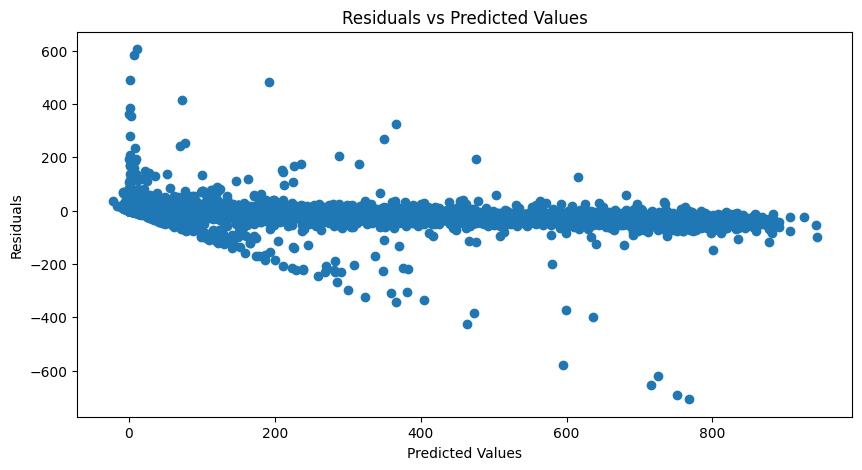

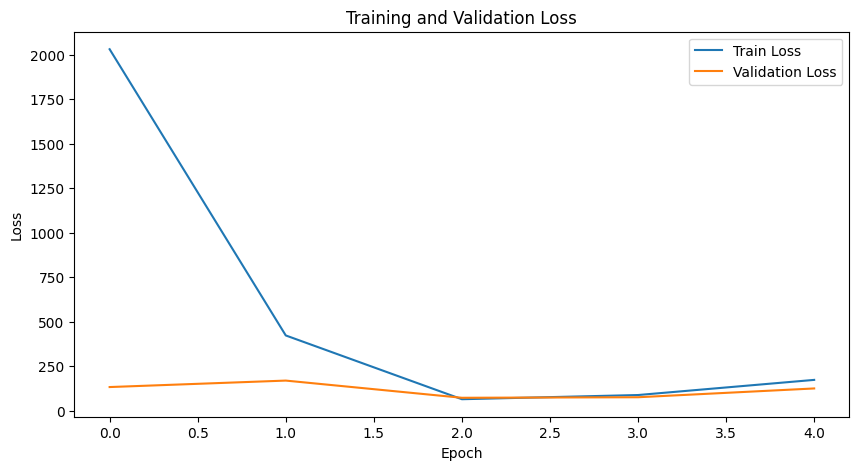

In [12]:
#### mlp unscaled     21.05.2024 ++++++++++++++++++++++ javab qavi 
 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error



# Use a subset of the training data for faster training
subset_fraction = 0.01  # Adjust this fraction as needed
train_features_subset, _, train_target_subset, _ = train_test_split(
    train_features, train_target, train_size=subset_fraction, random_state=42
)

print("Subset Train Features Shape:", train_features_subset.shape)
print("Subset Train Target Shape:", train_target_subset.shape)

# Prepare the data loaders
batch_size = 64

train_dataset = TensorDataset(torch.tensor(train_features_subset.values, dtype=torch.float32), 
                              torch.tensor(train_target_subset.values, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(torch.tensor(test_features.values, dtype=torch.float32), 
                             torch.tensor(test_target.values, dtype=torch.float32))
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_dim)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Define the model, loss function, and optimizer
input_dim = train_features_subset.shape[1]
output_dim = 1

model = MLP(input_dim, output_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 5
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for inputs, targets in train_loader:
        targets = targets.view(-1, 1)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        running_train_loss += loss.item()
    
    train_loss = running_train_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Validation
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            targets = targets.view(-1, 1)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_val_loss += loss.item()
    
    val_loss = running_val_loss / len(test_loader)
    val_losses.append(val_loss)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    test_predictions = []
    test_targets = []
    for inputs, targets in test_loader:
        outputs = model(inputs)
        test_predictions.extend(outputs.numpy())
        test_targets.extend(targets.numpy())

# Calculate RMSE for the test set
rmse_test = np.sqrt(mean_squared_error(test_targets, test_predictions))
print(f"RMSE on test data: {rmse_test}")

# Plot the first 200 predictions along with the corresponding test target values
print("First 200 Predictions and Respective Test Target Values:")
for i in range(200):
    print(f"Predicted: {test_predictions[i][0]}, Actual: {test_targets[i]}")

# Plot residuals
residuals = np.array(test_targets).reshape(-1, 1) - np.array(test_predictions).reshape(-1, 1)
plt.figure(figsize=(10, 5))
plt.scatter(test_predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Subset Train Features Shape: (12038, 40)
Subset Train Target Shape: (12038, 1)
Epoch [1/5], Train Loss: 0.0007, Validation Loss: 0.0000
Epoch [2/5], Train Loss: 0.0000, Validation Loss: 0.0000
Epoch [3/5], Train Loss: 0.0000, Validation Loss: 0.0000
Epoch [4/5], Train Loss: 0.0000, Validation Loss: 0.0000
Epoch [5/5], Train Loss: 0.0000, Validation Loss: 0.0000
RMSE on test data (scaled): 0.0036394093185663223
RMSE on test data (original scale): 17.83303309203943
First 200 Predictions and Respective Test Target Values (original scale):
Predicted: 80.93072868332266, Actual: 63.39999778654426
Predicted: 80.36606415063142, Actual: 63.19999950140715
Predicted: 83.05343215450644, Actual: 60.59999897731468
Predicted: 77.50104969844222, Actual: 62.000000663660465
Predicted: 72.83003603711724, Actual: 62.199998948797585
Predicted: 69.11702082425356, Actual: 61.19999839618802
Predicted: 70.43410896971821, Actual: 61.40000124478713
Predicted: 72.41432290375232, Actual: 62.000000663660465
Predict

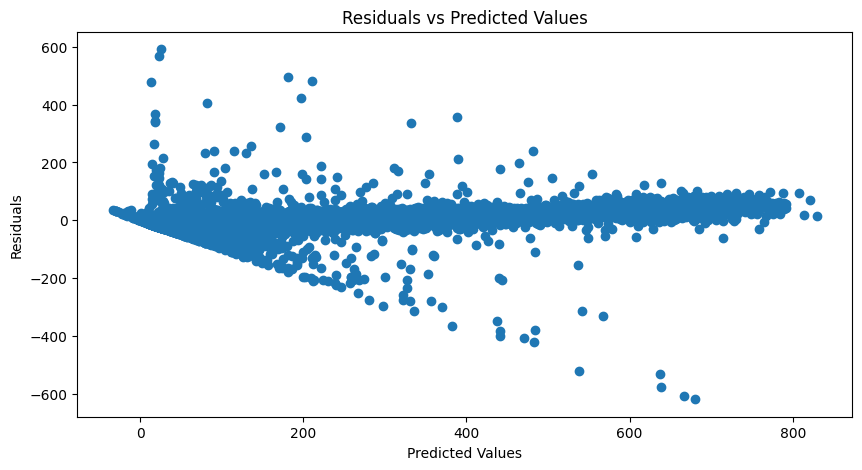

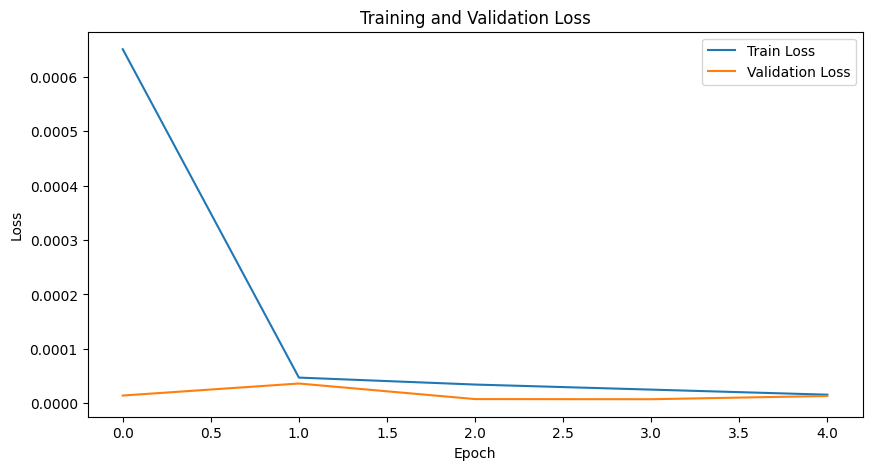

In [13]:
##### mlp scaled 21.05.2024  ++++++++++++++++ javab qavi 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error



# Scale the features and target using MinMaxScaler
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

train_features_scaled = scaler_features.fit_transform(train_features)
test_features_scaled = scaler_features.transform(test_features)

train_target_scaled = scaler_target.fit_transform(train_target.values.reshape(-1, 1))
test_target_scaled = scaler_target.transform(test_target.values.reshape(-1, 1))

# Use a subset of the training data for faster training
subset_fraction = 0.01  # Adjust this fraction as needed
train_features_subset, _, train_target_subset, _ = train_test_split(
    train_features_scaled, train_target_scaled, train_size=subset_fraction, random_state=42
)

print("Subset Train Features Shape:", train_features_subset.shape)
print("Subset Train Target Shape:", train_target_subset.shape)

# Prepare the data loaders
batch_size = 64

train_dataset = TensorDataset(torch.tensor(train_features_subset, dtype=torch.float32), 
                              torch.tensor(train_target_subset, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(torch.tensor(test_features_scaled, dtype=torch.float32), 
                             torch.tensor(test_target_scaled, dtype=torch.float32))
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define the model, loss function, and optimizer
input_dim = train_features_subset.shape[1]
model = MLP(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 5
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for inputs, targets in train_loader:
        targets = targets.view(-1, 1)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        running_train_loss += loss.item()
    
    train_loss = running_train_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Validation
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            targets = targets.view(-1, 1)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_val_loss += loss.item()
    
    val_loss = running_val_loss / len(test_loader)
    val_losses.append(val_loss)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    test_predictions = []
    test_targets = []
    for inputs, targets in test_loader:
        outputs = model(inputs)
        test_predictions.extend(outputs.numpy())
        test_targets.extend(targets.numpy())

# Calculate RMSE in the scaled state
rmse_scaled = np.sqrt(mean_squared_error(test_targets, test_predictions))
print(f"RMSE on test data (scaled): {rmse_scaled}")

# Inverse transform the predictions and targets to original scale
test_predictions_inverse = scaler_target.inverse_transform(test_predictions)
test_targets_inverse = scaler_target.inverse_transform(test_targets)

# Calculate RMSE for the test set in the original scale
rmse_original = np.sqrt(mean_squared_error(test_targets_inverse, test_predictions_inverse))
print(f"RMSE on test data (original scale): {rmse_original}")

# Plot the first 200 predictions along with the corresponding test target values
print("First 200 Predictions and Respective Test Target Values (original scale):")
for i in range(200):
    print(f"Predicted: {test_predictions_inverse[i][0]}, Actual: {test_targets_inverse[i][0]}")

# Plot residuals
residuals = np.array(test_targets_inverse).reshape(-1, 1) - np.array(test_predictions_inverse).reshape(-1, 1)
plt.figure(figsize=(10, 5))
plt.scatter(test_predictions_inverse, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


Subset Train Features Shape: (12038, 40)
Subset Train Target Shape: (12038,)
[0]	validation_0-rmse:152.08436	validation_1-rmse:166.94002
[1]	validation_0-rmse:138.05709	validation_1-rmse:153.66508
[2]	validation_0-rmse:125.40295	validation_1-rmse:141.16916
[3]	validation_0-rmse:113.99319	validation_1-rmse:129.60709
[4]	validation_0-rmse:103.68395	validation_1-rmse:119.25679
[5]	validation_0-rmse:94.38178	validation_1-rmse:110.47733
[6]	validation_0-rmse:85.97154	validation_1-rmse:101.94155
[7]	validation_0-rmse:78.37967	validation_1-rmse:94.15014
[8]	validation_0-rmse:71.49413	validation_1-rmse:87.23664
[9]	validation_0-rmse:65.25428	validation_1-rmse:80.36319
[10]	validation_0-rmse:59.58267	validation_1-rmse:74.17389
[11]	validation_0-rmse:54.42202	validation_1-rmse:68.64755
[12]	validation_0-rmse:49.75420	validation_1-rmse:63.76137
[13]	validation_0-rmse:45.52223	validation_1-rmse:59.35057
[14]	validation_0-rmse:41.68419	validation_1-rmse:55.08758
[15]	validation_0-rmse:38.19855	vali

c:\Users\a\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:9.57183	validation_1-rmse:23.10180
[34]	validation_0-rmse:8.99422	validation_1-rmse:22.75585
[35]	validation_0-rmse:8.46817	validation_1-rmse:22.21560
[36]	validation_0-rmse:7.98893	validation_1-rmse:21.78821
[37]	validation_0-rmse:7.55692	validation_1-rmse:21.41896
[38]	validation_0-rmse:7.15941	validation_1-rmse:21.13227
[39]	validation_0-rmse:6.78128	validation_1-rmse:20.86664
[40]	validation_0-rmse:6.44143	validation_1-rmse:20.59307
[41]	validation_0-rmse:6.12686	validation_1-rmse:20.38629
[42]	validation_0-rmse:5.81980	validation_1-rmse:20.11964
[43]	validation_0-rmse:5.54445	validation_1-rmse:19.92620
[44]	validation_0-rmse:5.29269	validation_1-rmse:19.72893
[45]	validation_0-rmse:5.07580	validation_1-rmse:19.60123
[46]	validation_0-rmse:4.87887	validation_1-rmse:19.49990
[47]	validation_0-rmse:4.67840	validation_1-rmse:19.36735
[48]	validation_0-rmse:4.51579	validation_1-rmse:19.28184
[49]	validation_0-rmse:4.34540	validation_1-rmse:19.16238
[50]	validatio

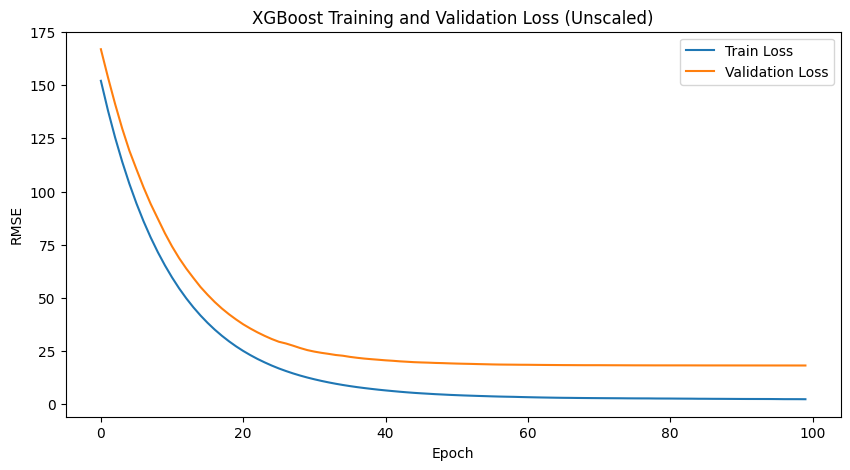

First 200 Predictions and Respective Test Target Values (unscaled):
Predicted: 66.9696044921875, Actual: 63.4
Predicted: 63.2591667175293, Actual: 63.2
Predicted: 62.82429122924805, Actual: 60.6
Predicted: 60.71846389770508, Actual: 62.0
Predicted: 62.39163589477539, Actual: 62.2
Predicted: 62.31808853149414, Actual: 61.2
Predicted: 61.44148635864258, Actual: 61.4
Predicted: 61.520992279052734, Actual: 62.0
Predicted: 62.389122009277344, Actual: 62.4
Predicted: 62.420249938964844, Actual: 63.0
Predicted: 62.94914627075195, Actual: 63.4
Predicted: 62.825889587402344, Actual: 65.0
Predicted: 65.18305969238281, Actual: 65.6
Predicted: 66.22160339355469, Actual: 64.4
Predicted: 63.96907043457031, Actual: 67.6
Predicted: 66.59898376464844, Actual: 69.6
Predicted: 69.52251434326172, Actual: 73.0
Predicted: 72.629150390625, Actual: 71.4
Predicted: 71.23629760742188, Actual: 69.2
Predicted: 70.10660552978516, Actual: 68.8
Predicted: 69.21979522705078, Actual: 68.6
Predicted: 68.60836029052734,

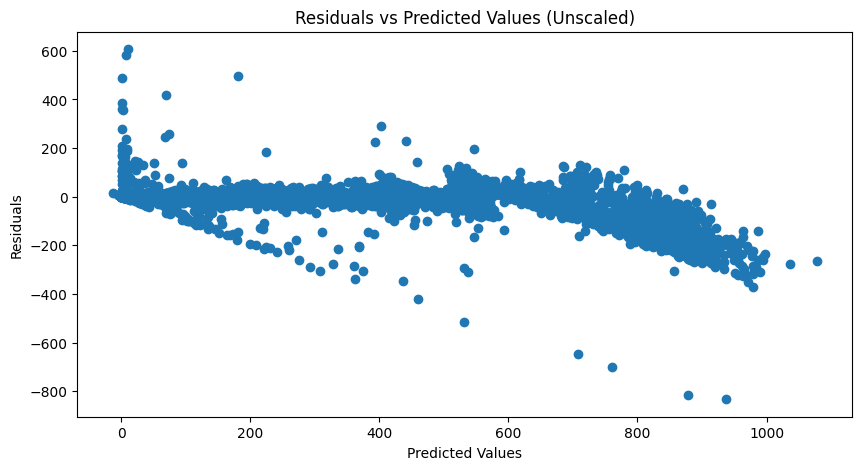

In [16]:
### xgboost unscaled 21.05.2024 +++++++++++++++++++++++++++ javab khoob 


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



# Use a subset of the training data for faster training
subset_fraction = 0.01  # Adjust this fraction as needed
train_features_subset, _, train_target_subset, _ = train_test_split(
    train_features, train_target, train_size=subset_fraction, random_state=42
)

print("Subset Train Features Shape:", train_features_subset.shape)
print("Subset Train Target Shape:", train_target_subset.shape)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_features_subset, train_target_subset, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
xgb_model_unscaled = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Train the model and record training and validation loss
eval_set = [(X_train, y_train), (X_val, y_val)]
xgb_model_unscaled.fit(X_train, y_train, eval_metric="rmse", eval_set=eval_set, verbose=True)

# Predict on test data
y_pred_unscaled = xgb_model_unscaled.predict(test_features)

# Calculate RMSE
rmse_unscaled = np.sqrt(mean_squared_error(test_target, y_pred_unscaled))
print(f"RMSE on test data (unscaled): {rmse_unscaled}")

# Plot the training and validation loss
results = xgb_model_unscaled.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
plt.figure(figsize=(10, 5))
plt.plot(x_axis, results['validation_0']['rmse'], label='Train Loss')
plt.plot(x_axis, results['validation_1']['rmse'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('XGBoost Training and Validation Loss (Unscaled)')
plt.legend()
plt.show()

# Plot the first 200 predictions along with the corresponding test target values
print("First 200 Predictions and Respective Test Target Values (unscaled):")
for i in range(200):
    print(f"Predicted: {y_pred_unscaled[i]}, Actual: {test_target.values[i]}")

# Plot residuals
residuals_unscaled = test_target.values - y_pred_unscaled
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_unscaled, residuals_unscaled)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Unscaled)')
plt.show()




Subset Train Features Shape (scaled): (12038, 40)
Subset Train Target Shape (scaled): (12038, 1)
[0]	validation_0-rmse:0.03104	validation_1-rmse:0.03407
[1]	validation_0-rmse:0.02818	validation_1-rmse:0.03136
[2]	validation_0-rmse:0.02559	validation_1-rmse:0.02881
[3]	validation_0-rmse:0.02326	validation_1-rmse:0.02645
[4]	validation_0-rmse:0.02116	validation_1-rmse:0.02434
[5]	validation_0-rmse:0.01926	validation_1-rmse:0.02255
[6]	validation_0-rmse:0.01755	validation_1-rmse:0.02080
[7]	validation_0-rmse:0.01600	validation_1-rmse:0.01921
[8]	validation_0-rmse:0.01459	validation_1-rmse:0.01780
[9]	validation_0-rmse:0.01332	validation_1-rmse:0.01640
[10]	validation_0-rmse:0.01216	validation_1-rmse:0.01514
[11]	validation_0-rmse:0.01111	validation_1-rmse:0.01401
[12]	validation_0-rmse:0.01015	validation_1-rmse:0.01301
[13]	validation_0-rmse:0.00929	validation_1-rmse:0.01211
[14]	validation_0-rmse:0.00851	validation_1-rmse:0.01124
[15]	validation_0-rmse:0.00780	validation_1-rmse:0.01049
[

c:\Users\a\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.00274	validation_1-rmse:0.00538
[29]	validation_0-rmse:0.00255	validation_1-rmse:0.00519
[30]	validation_0-rmse:0.00238	validation_1-rmse:0.00504
[31]	validation_0-rmse:0.00223	validation_1-rmse:0.00492
[32]	validation_0-rmse:0.00208	validation_1-rmse:0.00482
[33]	validation_0-rmse:0.00195	validation_1-rmse:0.00471
[34]	validation_0-rmse:0.00184	validation_1-rmse:0.00464
[35]	validation_0-rmse:0.00173	validation_1-rmse:0.00453
[36]	validation_0-rmse:0.00163	validation_1-rmse:0.00445
[37]	validation_0-rmse:0.00154	validation_1-rmse:0.00437
[38]	validation_0-rmse:0.00146	validation_1-rmse:0.00431
[39]	validation_0-rmse:0.00138	validation_1-rmse:0.00426
[40]	validation_0-rmse:0.00131	validation_1-rmse:0.00420
[41]	validation_0-rmse:0.00125	validation_1-rmse:0.00415
[42]	validation_0-rmse:0.00119	validation_1-rmse:0.00411
[43]	validation_0-rmse:0.00113	validation_1-rmse:0.00407
[44]	validation_0-rmse:0.00108	validation_1-rmse:0.00403
[45]	validation_0-rmse:0.00104	

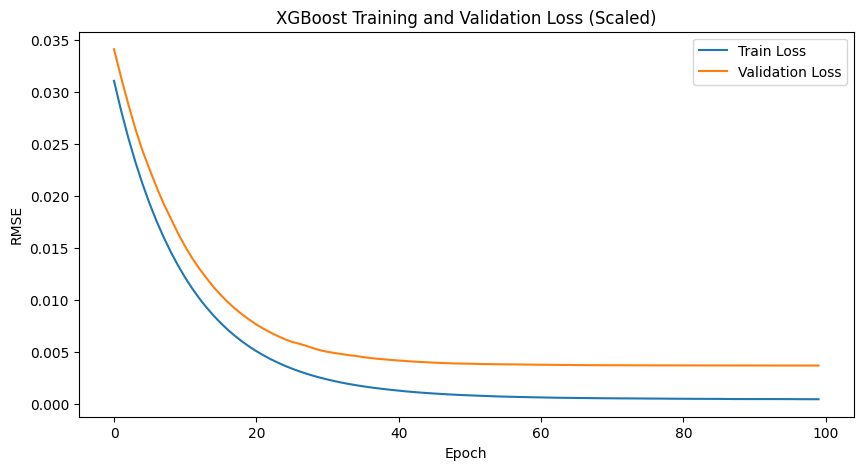

First 200 Predictions and Respective Test Target Values (original scale):
Predicted: 66.93453979492188, Actual: 63.4
Predicted: 63.409976959228516, Actual: 63.2
Predicted: 62.69071960449219, Actual: 60.6
Predicted: 60.630043029785156, Actual: 62.0
Predicted: 62.35093307495117, Actual: 62.2
Predicted: 62.266815185546875, Actual: 61.199999999999996
Predicted: 61.176246643066406, Actual: 61.4
Predicted: 61.456886291503906, Actual: 62.0
Predicted: 62.427371978759766, Actual: 62.4
Predicted: 62.329097747802734, Actual: 63.0
Predicted: 62.86711502075195, Actual: 63.4
Predicted: 62.79769515991211, Actual: 65.0
Predicted: 65.21904754638672, Actual: 65.6
Predicted: 66.2027816772461, Actual: 64.4
Predicted: 63.90852737426758, Actual: 67.6
Predicted: 66.58720397949219, Actual: 69.6
Predicted: 69.46875762939453, Actual: 73.0
Predicted: 72.61903381347656, Actual: 71.4
Predicted: 71.19720458984375, Actual: 69.2
Predicted: 70.06752014160156, Actual: 68.8
Predicted: 69.19629669189453, Actual: 68.6
Pre

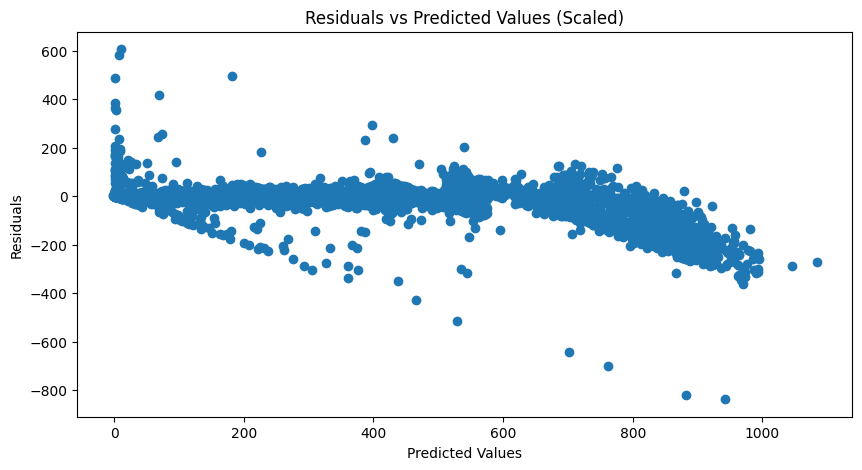

In [18]:
#### xgboost scaled 21.05.2024 +++++++++++++++++++ javab khoob 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

 
# Scale the features and target using MinMaxScaler
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

train_features_scaled = scaler_features.fit_transform(train_features)
test_features_scaled = scaler_features.transform(test_features)

train_target_scaled = scaler_target.fit_transform(train_target.values.reshape(-1, 1))
test_target_scaled = scaler_target.transform(test_target.values.reshape(-1, 1))

# Use a subset of the training data for faster training
subset_fraction = 0.01  # Adjust this fraction as needed
train_features_subset_scaled, _, train_target_subset_scaled, _ = train_test_split(
    train_features_scaled, train_target_scaled, train_size=subset_fraction, random_state=42
)

print("Subset Train Features Shape (scaled):", train_features_subset_scaled.shape)
print("Subset Train Target Shape (scaled):", train_target_subset_scaled.shape)

# Split the scaled data into training and validation sets
X_train_scaled, X_val_scaled, y_train_scaled, y_val_scaled = train_test_split(
    train_features_subset_scaled, train_target_subset_scaled, test_size=0.2, random_state=42
)

# Initialize the XGBoost regressor
xgb_model_scaled = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)### epoch here 

# Train the model and record training and validation loss
eval_set_scaled = [(X_train_scaled, y_train_scaled), (X_val_scaled, y_val_scaled)]
xgb_model_scaled.fit(X_train_scaled, y_train_scaled.ravel(), eval_metric="rmse", eval_set=eval_set_scaled, verbose=True)

# Predict on test data
y_pred_scaled = xgb_model_scaled.predict(test_features_scaled)

# Calculate RMSE in the scaled state
rmse_scaled = np.sqrt(mean_squared_error(test_target_scaled, y_pred_scaled))
print(f"RMSE on test data (scaled): {rmse_scaled}")

# Inverse transform the predictions and targets to original scale
y_pred_inverse = scaler_target.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_inverse = scaler_target.inverse_transform(test_target_scaled)

# Calculate RMSE for the test set in the original scale
rmse_original = np.sqrt(mean_squared_error(y_test_inverse, y_pred_inverse))
print(f"RMSE on test data (original scale): {rmse_original}")

# Plot the training and validation loss
results_scaled = xgb_model_scaled.evals_result()
epochs = len(results_scaled['validation_0']['rmse'])
x_axis = range(0, epochs)
plt.figure(figsize=(10, 5))
plt.plot(x_axis, results_scaled['validation_0']['rmse'], label='Train Loss')
plt.plot(x_axis, results_scaled['validation_1']['rmse'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('XGBoost Training and Validation Loss (Scaled)')
plt.legend()
plt.show()

# Plot the first 200 predictions along with the corresponding test target values
print("First 200 Predictions and Respective Test Target Values (original scale):")
for i in range(200):
    print(f"Predicted: {y_pred_inverse[i][0]}, Actual: {y_test_inverse[i][0]}")

# Plot residuals
residuals_scaled = y_test_inverse - y_pred_inverse
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_inverse, residuals_scaled)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Scaled)')
plt.show()



Subset Train Features Shape: (12038, 40)
Subset Train Target Shape: (12038,)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 154.3787019	test: 170.3024019	best: 170.3024019 (0)	total: 138ms	remaining: 13.7s
10:	learn: 70.6211055	test: 87.5559598	best: 87.5559598 (10)	total: 185ms	remaining: 1.5s
20:	learn: 37.3147435	test: 51.2279012	best: 51.2279012 (20)	total: 232ms	remaining: 871ms
30:	learn: 23.2694908	test: 33.5424527	best: 33.5424527 (30)	total: 273ms	remaining: 607ms
40:	learn: 17.0928332	test: 25.9373995	best: 25.9373995 (40)	total: 313ms	remaining: 450ms
50:	learn: 14.0304808	test: 21.9932999	best: 21.9932999 (50)	total: 356ms	remaining: 342ms
60:	learn: 12.2393372	test: 19.4590594	best: 19.4590594 (60)	total: 399ms	remaining: 255ms
70:	learn: 11.0400134	test: 18.2969522	best: 18.2969522 (70)	total: 436ms	remaining: 178ms
80:	learn: 10.1977839	test: 17.5806928	best: 17.5806928 (80)	total: 474ms	remaining: 111ms
90:	learn: 9.5269141	test: 17.1937556	best: 17.1937556 (90)	total: 514ms	remaining: 50.8ms
99:	learn: 8.9436918	test: 17.0436317	best: 16.9415185 (97)	total: 550ms	remaining: 0us

b

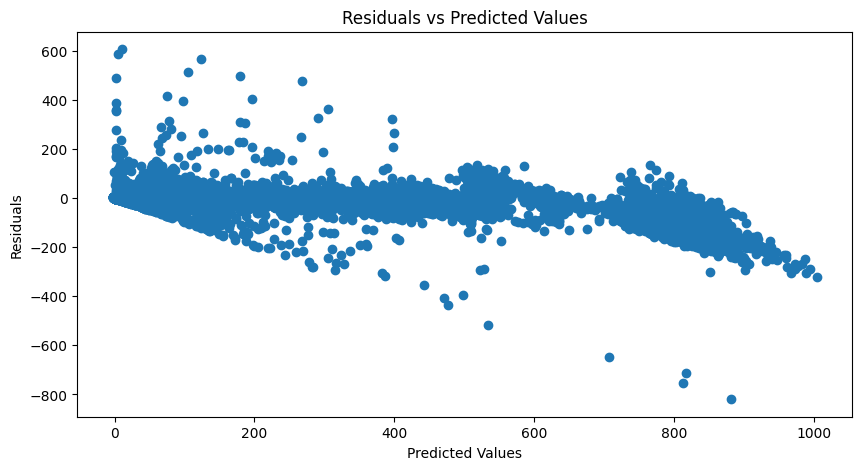

In [2]:
##catboost unscaled data  23.05.2024++++++++++++++++

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Use a subset of the training data for faster training
subset_fraction = 0.01  # Adjust this fraction as needed
train_features_subset, _, train_target_subset, _ = train_test_split(
    train_features, train_target, train_size=subset_fraction, random_state=42
)

print("Subset Train Features Shape:", train_features_subset.shape)
print("Subset Train Target Shape:", train_target_subset.shape)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_features_subset, train_target_subset, test_size=0.2, random_state=42)

# Initialize the CatBoost regressor
catboost_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, random_seed=42, verbose=10)

# Train the model and record training and validation loss
catboost_model.fit(X_train, y_train, eval_set=(X_val, y_val), plot=True)

# Predict on test data
y_pred = catboost_model.predict(test_features)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_target, y_pred))
print(f"RMSE on test data: {rmse}")

# Plot the first 200 predictions along with the corresponding test target values
print("First 200 Predictions and Respective Test Target Values:")
for i in range(200):
    print(f"Predicted: {y_pred[i]}, Actual: {test_target.values[i]}")

# Plot residuals
residuals = test_target.values - y_pred
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


Subset Train Features Shape (scaled): (12038, 40)
Subset Train Target Shape (scaled): (12038, 1)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0315060	test: 0.0347557	best: 0.0347557 (0)	total: 4.73ms	remaining: 469ms
10:	learn: 0.0144125	test: 0.0178686	best: 0.0178686 (10)	total: 50.1ms	remaining: 405ms
20:	learn: 0.0076153	test: 0.0104547	best: 0.0104547 (20)	total: 89.4ms	remaining: 336ms
30:	learn: 0.0047489	test: 0.0068454	best: 0.0068454 (30)	total: 126ms	remaining: 280ms
40:	learn: 0.0034883	test: 0.0052934	best: 0.0052934 (40)	total: 163ms	remaining: 234ms
50:	learn: 0.0028637	test: 0.0044883	best: 0.0044883 (50)	total: 200ms	remaining: 192ms
60:	learn: 0.0024783	test: 0.0039782	best: 0.0039782 (60)	total: 238ms	remaining: 152ms
70:	learn: 0.0022043	test: 0.0037628	best: 0.0037628 (70)	total: 280ms	remaining: 114ms
80:	learn: 0.0020366	test: 0.0036269	best: 0.0036269 (80)	total: 318ms	remaining: 74.6ms
90:	learn: 0.0018887	test: 0.0035562	best: 0.0035562 (90)	total: 355ms	remaining: 35.1ms
99:	learn: 0.0017620	test: 0.0034735	best: 0.0034735 (99)	total: 389ms	remaining: 0us

bestTest = 0.003473470986
best

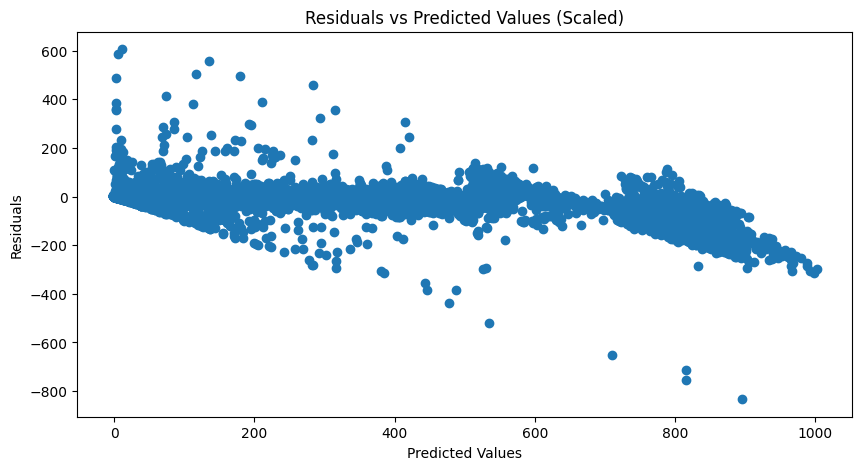

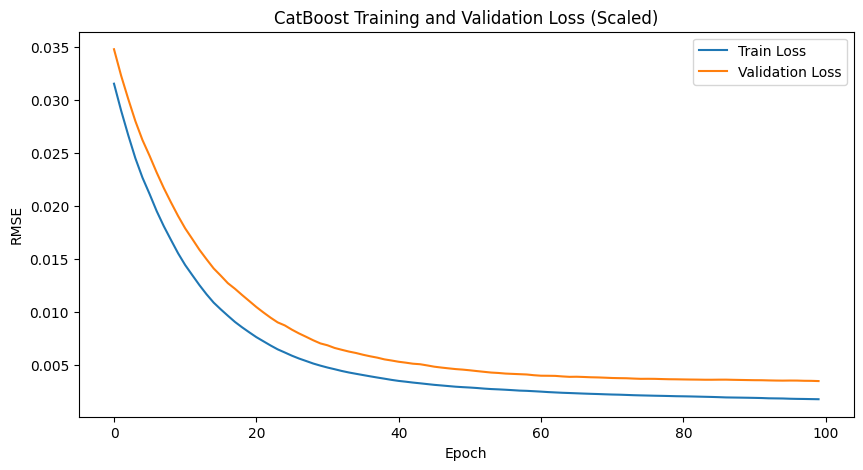

In [5]:
# catboost scaled data 23.05.2024 +++++++++++++++

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Scale the features and target using MinMaxScaler
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

train_features_scaled = scaler_features.fit_transform(train_features)
test_features_scaled = scaler_features.transform(test_features)

train_target_scaled = scaler_target.fit_transform(train_target.values.reshape(-1, 1))
test_target_scaled = scaler_target.transform(test_target.values.reshape(-1, 1))

# Use a subset of the training data for faster training
subset_fraction = 0.01  # Adjust this fraction as needed
train_features_subset, _, train_target_subset, _ = train_test_split(
    train_features_scaled, train_target_scaled, train_size=subset_fraction, random_state=42
)

print("Subset Train Features Shape (scaled):", train_features_subset.shape)
print("Subset Train Target Shape (scaled):", train_target_subset.shape)

# Split the scaled data into training and validation sets
X_train_scaled, X_val_scaled, y_train_scaled, y_val_scaled = train_test_split(
    train_features_subset, train_target_subset, test_size=0.2, random_state=42
)

# Initialize the CatBoost regressor
catboost_model_scaled = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, random_seed=42, verbose=10, eval_metric="RMSE")

# Train the model and record training and validation loss
catboost_model_scaled.fit(X_train_scaled, y_train_scaled, eval_set=(X_val_scaled, y_val_scaled), plot=True)

# Predict on test data
y_pred_scaled = catboost_model_scaled.predict(test_features_scaled)

# Calculate RMSE in the scaled state
rmse_scaled = np.sqrt(mean_squared_error(test_target_scaled, y_pred_scaled))
print(f"RMSE on test data (scaled): {rmse_scaled}")

# Inverse transform the predictions and targets to original scale
y_pred_inverse = scaler_target.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_inverse = scaler_target.inverse_transform(test_target_scaled)

# Calculate RMSE for the test set in the original scale
rmse_original = np.sqrt(mean_squared_error(y_test_inverse, y_pred_inverse))
print(f"RMSE on test data (original scale): {rmse_original}")

# Plot the first 200 predictions along with the corresponding test target values
print("First 200 Predictions and Respective Test Target Values (original scale):")
for i in range(200):
    print(f"Predicted: {y_pred_inverse[i][0]}, Actual: {y_test_inverse[i][0]}")

# Plot residuals
residuals_scaled = y_test_inverse - y_pred_inverse
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_inverse, residuals_scaled)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Scaled)')
plt.show()

# Extract the training and validation losses from the evaluation results
results_scaled = catboost_model_scaled.evals_result_
train_rmse = results_scaled['learn']['RMSE']
val_rmse = results_scaled['validation']['RMSE']

# Plot the training and validation loss
epochs = len(train_rmse)
x_axis = range(epochs)
plt.figure(figsize=(10, 5))
plt.plot(x_axis, train_rmse, label='Train Loss')
plt.plot(x_axis, val_rmse, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('CatBoost Training and Validation Loss (Scaled)')
plt.legend()
plt.show()


Subset Train Features Shape (unscaled): (12038, 40)
Subset Train Target Shape (unscaled): (12038,)
Epoch [1/5], Train Loss: 2727.8620, Validation Loss: 120.4098
Epoch [2/5], Train Loss: 649.1298, Validation Loss: 91.6391
Epoch [3/5], Train Loss: 171.9449, Validation Loss: 75.3814
Epoch [4/5], Train Loss: 57.1436, Validation Loss: 136.8681
Epoch [5/5], Train Loss: 109.5961, Validation Loss: 74.3300
RMSE on test data: 8.62291145324707
First 200 Predictions and Respective Test Target Values:
Predicted: 65.82151794433594, Actual: 63.400001525878906
Predicted: 63.302879333496094, Actual: 63.20000076293945
Predicted: 62.27980422973633, Actual: 60.599998474121094
Predicted: 60.51328659057617, Actual: 62.0
Predicted: 60.577049255371094, Actual: 62.20000076293945
Predicted: 61.17571258544922, Actual: 61.20000076293945
Predicted: 60.880374908447266, Actual: 61.400001525878906
Predicted: 61.27383804321289, Actual: 62.0
Predicted: 61.76102828979492, Actual: 62.400001525878906
Predicted: 62.3804397

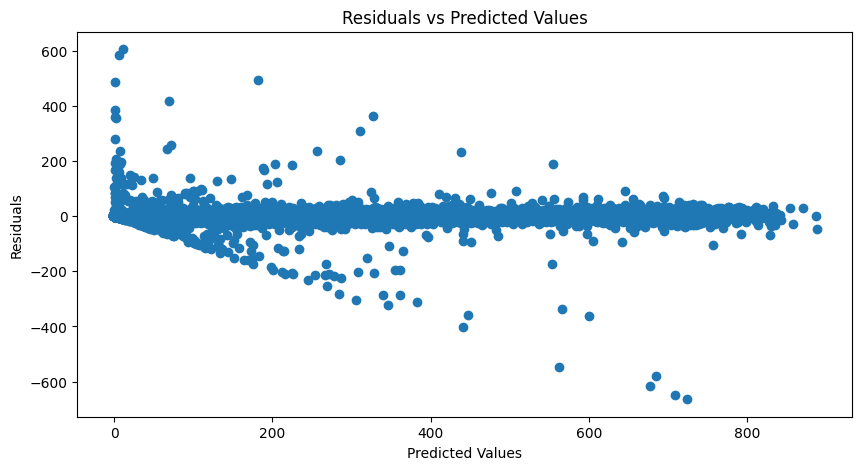

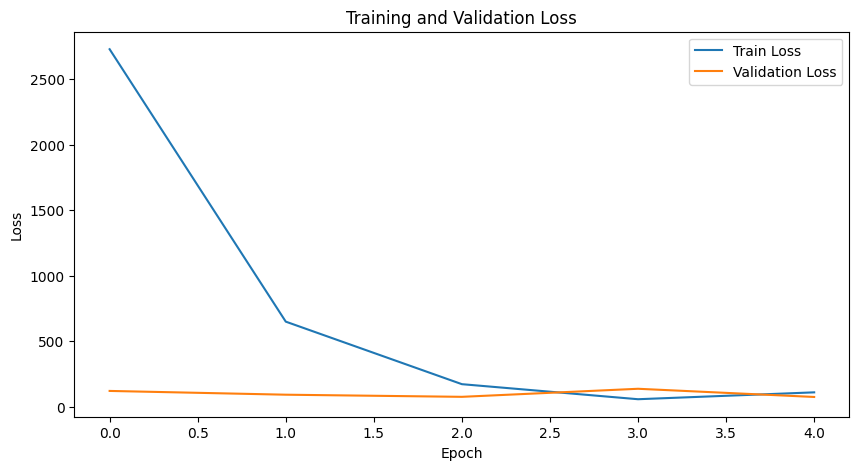

In [6]:
###### snn unscaled 23.05.2024 +++++++++++++++ ajib khoobe!!!!


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

 
# Use a subset of the training data for faster training
subset_fraction = 0.01  # Adjust this fraction as needed
train_features_subset, _, train_target_subset, _ = train_test_split(
    train_features, train_target, train_size=subset_fraction, random_state=42
)

print("Subset Train Features Shape (unscaled):", train_features_subset.shape)
print("Subset Train Target Shape (unscaled):", train_target_subset.shape)

# Prepare the data loaders
batch_size = 64

train_dataset = TensorDataset(torch.tensor(train_features_subset.values, dtype=torch.float32), 
                              torch.tensor(train_target_subset.values, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(torch.tensor(test_features.values, dtype=torch.float32), 
                             torch.tensor(test_target.values, dtype=torch.float32))
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define the model, loss function, and optimizer
input_dim = train_features_subset.shape[1]
model = SimpleNN(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 5
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for inputs, targets in train_loader:
        targets = targets.view(-1, 1)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        running_train_loss += loss.item()
    
    train_loss = running_train_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Validation
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            targets = targets.view(-1, 1)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_val_loss += loss.item()
    
    val_loss = running_val_loss / len(test_loader)
    val_losses.append(val_loss)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    test_predictions = []
    test_targets = []
    for inputs, targets in test_loader:
        outputs = model(inputs)
        test_predictions.extend(outputs.numpy())
        test_targets.extend(targets.numpy())

# Calculate RMSE for the test set
rmse_test = np.sqrt(mean_squared_error(test_targets, test_predictions))
print(f"RMSE on test data: {rmse_test}")

# Plot the first 200 predictions along with the corresponding test target values
print("First 200 Predictions and Respective Test Target Values:")
for i in range(200):
    print(f"Predicted: {test_predictions[i][0]}, Actual: {test_targets[i]}")

# Plot residuals
residuals = np.array(test_targets).reshape(-1, 1) - np.array(test_predictions).reshape(-1, 1)
plt.figure(figsize=(10, 5))
plt.scatter(test_predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


Subset Train Features Shape (scaled): (12038, 40)
Subset Train Target Shape (scaled): (12038, 1)
Epoch [1/5], Train Loss: 0.0003, Validation Loss: 0.0000
Epoch [2/5], Train Loss: 0.0000, Validation Loss: 0.0000
Epoch [3/5], Train Loss: 0.0000, Validation Loss: 0.0000
Epoch [4/5], Train Loss: 0.0000, Validation Loss: 0.0000
Epoch [5/5], Train Loss: 0.0000, Validation Loss: 0.0000
RMSE on test data (scaled): 0.004186965525150299
RMSE on test data (original scale): 20.51604652404785
First 200 Predictions and Respective Test Target Values (original scale):
Predicted: 50.69688034057617, Actual: 63.39999771118164
Predicted: 53.92803192138672, Actual: 63.20000076293945
Predicted: 53.3983039855957, Actual: 60.60000228881836
Predicted: 46.98339080810547, Actual: 62.000003814697266
Predicted: 41.418670654296875, Actual: 62.20000076293945
Predicted: 39.51990509033203, Actual: 61.20000076293945
Predicted: 40.6456184387207, Actual: 61.400001525878906
Predicted: 42.83338165283203, Actual: 62.0000038

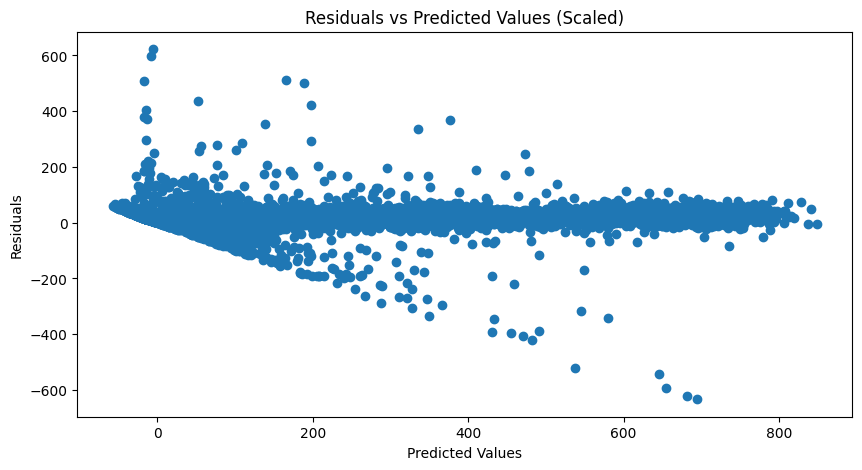

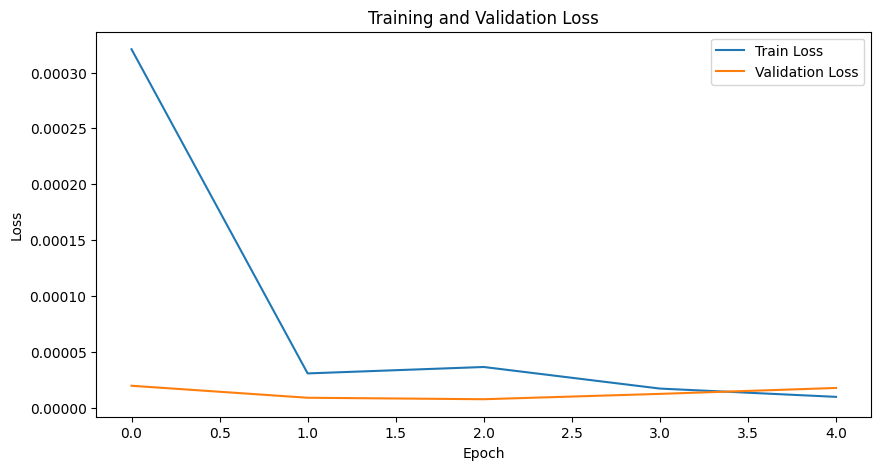

In [7]:
####SNN saced data 23.05.2024 ++++
 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error



# Scale the features and target using MinMaxScaler
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

train_features_scaled = scaler_features.fit_transform(train_features)
test_features_scaled = scaler_features.transform(test_features)

train_target_scaled = scaler_target.fit_transform(train_target.values.reshape(-1, 1))
test_target_scaled = scaler_target.transform(test_target.values.reshape(-1, 1))

# Use a subset of the training data for faster training
subset_fraction = 0.01  # Adjust this fraction as needed
train_features_subset, _, train_target_subset, _ = train_test_split(
    train_features_scaled, train_target_scaled, train_size=subset_fraction, random_state=42
)

print("Subset Train Features Shape (scaled):", train_features_subset.shape)
print("Subset Train Target Shape (scaled):", train_target_subset.shape)

# Prepare the data loaders
batch_size = 64

train_dataset = TensorDataset(torch.tensor(train_features_subset, dtype=torch.float32), 
                              torch.tensor(train_target_subset, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(torch.tensor(test_features_scaled, dtype=torch.float32), 
                             torch.tensor(test_target_scaled, dtype=torch.float32))
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define the model, loss function, and optimizer
input_dim = train_features_subset.shape[1]
model = SimpleNN(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 5
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for inputs, targets in train_loader:
        targets = targets.view(-1, 1)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        running_train_loss += loss.item()
    
    train_loss = running_train_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Validation
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            targets = targets.view(-1, 1)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_val_loss += loss.item()
    
    val_loss = running_val_loss / len(test_loader)
    val_losses.append(val_loss)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    test_predictions = []
    test_targets = []
    for inputs, targets in test_loader:
        outputs = model(inputs)
        test_predictions.extend(outputs.numpy())
        test_targets.extend(targets.numpy())

# Calculate RMSE in the scaled state
rmse_scaled = np.sqrt(mean_squared_error(test_targets, test_predictions))
print(f"RMSE on test data (scaled): {rmse_scaled}")

# Inverse transform the predictions and targets to original scale
test_predictions_inverse = scaler_target.inverse_transform(np.array(test_predictions).reshape(-1, 1))
test_targets_inverse = scaler_target.inverse_transform(np.array(test_targets).reshape(-1, 1))

# Calculate RMSE for the test set in the original scale
rmse_original = np.sqrt(mean_squared_error(test_targets_inverse, test_predictions_inverse))
print(f"RMSE on test data (original scale): {rmse_original}")

# Plot the first 200 predictions along with the corresponding test target values
print("First 200 Predictions and Respective Test Target Values (original scale):")
for i in range(200):
    print(f"Predicted: {test_predictions_inverse[i][0]}, Actual: {test_targets_inverse[i][0]}")

# Plot residuals
residuals = np.array(test_targets_inverse).reshape(-1, 1) - np.array(test_predictions_inverse).reshape(-1, 1)
plt.figure(figsize=(10, 5))
plt.scatter(test_predictions_inverse, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Scaled)')
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()



Subset Train Features Shape: (12038, 40)
Subset Train Target Shape: (12038,)
Epoch [1/20], Train Loss: 32062.1603, Validation Loss: 17947.0545
Epoch [2/20], Train Loss: 28507.8493, Validation Loss: 13530.5185
Epoch [3/20], Train Loss: 23282.8296, Validation Loss: 10343.4878
Epoch [4/20], Train Loss: 18149.7928, Validation Loss: 5373.2495
Epoch [5/20], Train Loss: 14551.3929, Validation Loss: 7084.4510
Epoch [6/20], Train Loss: 12347.1188, Validation Loss: 2290.6828
Epoch [7/20], Train Loss: 12088.4684, Validation Loss: 1817.7314
Epoch [8/20], Train Loss: 11096.2464, Validation Loss: 2520.9347
Epoch [9/20], Train Loss: 10501.0181, Validation Loss: 1982.3695
Epoch [10/20], Train Loss: 9688.7265, Validation Loss: 2991.8503
Epoch [11/20], Train Loss: 9163.8208, Validation Loss: 2342.4912
Epoch [12/20], Train Loss: 8432.0732, Validation Loss: 529.9962
Epoch [13/20], Train Loss: 8744.0756, Validation Loss: 4572.0056
Epoch [14/20], Train Loss: 7811.1641, Validation Loss: 3645.2536
Epoch [15/2

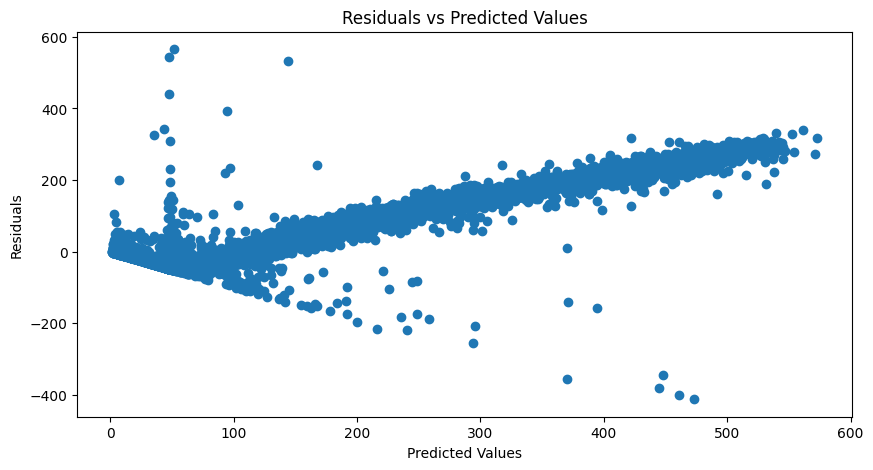

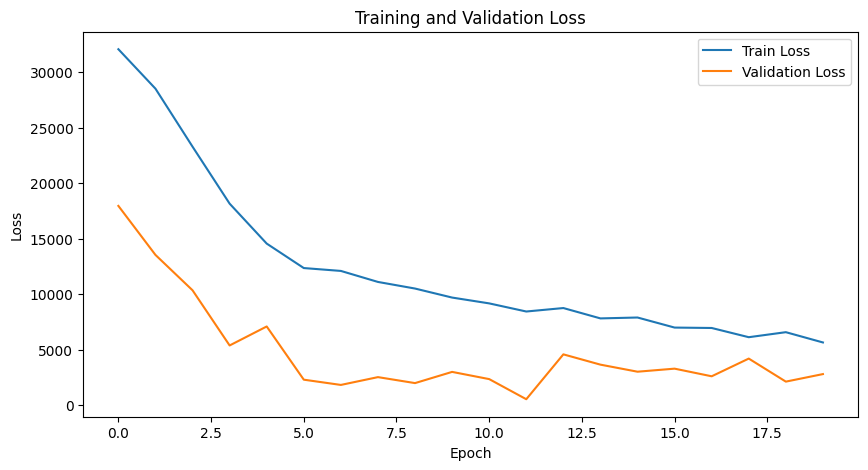

In [11]:
#### grownet unsacled 23.05.2024 ++++++++++++++



import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

 
# Use a subset of the training data for faster training
subset_fraction = 0.01  # Adjust this fraction as needed
train_features_subset, _, train_target_subset, _ = train_test_split(
    train_features, train_target, train_size=subset_fraction, random_state=42
)

print("Subset Train Features Shape:", train_features_subset.shape)
print("Subset Train Target Shape:", train_target_subset.shape)

# Prepare the data loaders
batch_size = 64

train_dataset = TensorDataset(torch.tensor(train_features_subset.values, dtype=torch.float32), 
                              torch.tensor(train_target_subset.values, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(torch.tensor(test_features.values, dtype=torch.float32), 
                             torch.tensor(test_target.values, dtype=torch.float32))
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class GrowNet(nn.Module):
    def __init__(self, input_dim):
        super(GrowNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.fc4 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(p=0.5)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.relu(self.bn3(self.fc3(x)))
        x = self.fc4(x)
        return x

# Define the model, loss function, and optimizer
input_dim = train_features_subset.shape[1]
model = GrowNet(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 20
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for inputs, targets in train_loader:
        targets = targets.view(-1, 1)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        running_train_loss += loss.item()
    
    train_loss = running_train_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Validation
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            targets = targets.view(-1, 1)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_val_loss += loss.item()
    
    val_loss = running_val_loss / len(test_loader)
    val_losses.append(val_loss)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    test_predictions = []
    test_targets = []
    for inputs, targets in test_loader:
        outputs = model(inputs)
        test_predictions.extend(outputs.numpy())
        test_targets.extend(targets.numpy())

# Calculate RMSE for the test set
rmse_test = np.sqrt(mean_squared_error(test_targets, test_predictions))
print(f"RMSE on test data: {rmse_test}")

# Plot the first 200 predictions along with the corresponding test target values
print("First 200 Predictions and Respective Test Target Values:")
for i in range(200):
    print(f"Predicted: {test_predictions[i][0]}, Actual: {test_targets[i]}")

# Plot residuals
residuals = np.array(test_targets).reshape(-1, 1) - np.array(test_predictions).reshape(-1, 1)
plt.figure(figsize=(10, 5))
plt.scatter(test_predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()






Subset Train Features Shape (scaled): (12038, 40)
Subset Train Target Shape (scaled): (12038, 1)
Epoch [1/12], Train Loss: 0.0168, Validation Loss: 0.0005
Epoch [2/12], Train Loss: 0.0023, Validation Loss: 0.0002
Epoch [3/12], Train Loss: 0.0010, Validation Loss: 0.0002
Epoch [4/12], Train Loss: 0.0008, Validation Loss: 0.0001
Epoch [5/12], Train Loss: 0.0005, Validation Loss: 0.0001
Epoch [6/12], Train Loss: 0.0004, Validation Loss: 0.0001
Epoch [7/12], Train Loss: 0.0004, Validation Loss: 0.0003
Epoch [8/12], Train Loss: 0.0003, Validation Loss: 0.0001
Epoch [9/12], Train Loss: 0.0004, Validation Loss: 0.0001
Epoch [10/12], Train Loss: 0.0003, Validation Loss: 0.0003
Epoch [11/12], Train Loss: 0.0004, Validation Loss: 0.0001
Epoch [12/12], Train Loss: 0.0002, Validation Loss: 0.0001
RMSE on test data (scaled): 0.009793680161237717
RMSE on test data (original scale): 47.98883819580078
First 200 Predictions and Respective Test Target Values (original scale):
Predicted: 46.5785865783691

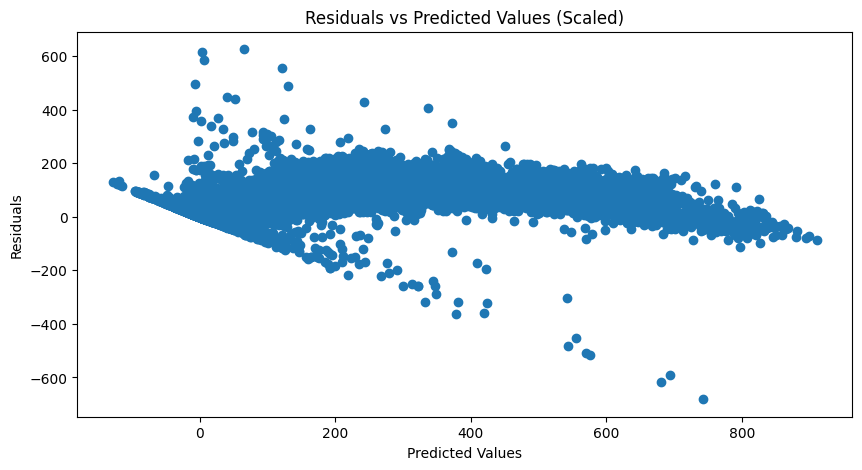

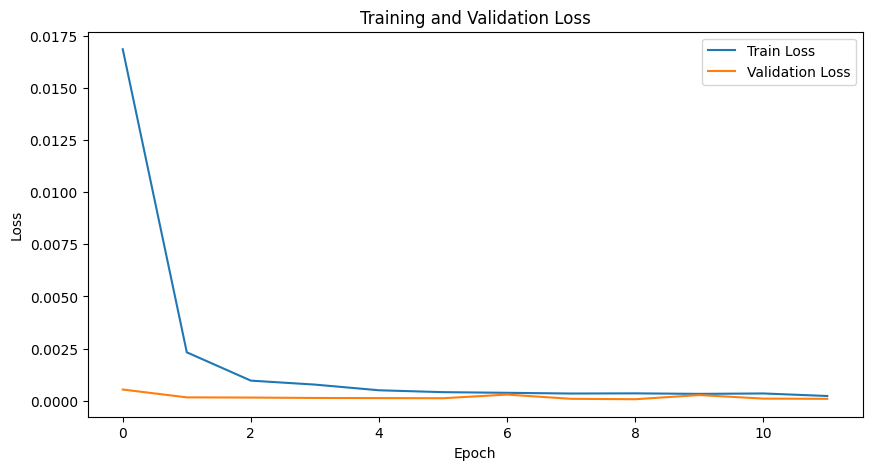

In [14]:
#### grownet scaled 23.05.2024 ++++++++++++++
 


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Scale the features and target using MinMaxScaler
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

train_features_scaled = scaler_features.fit_transform(train_features)
test_features_scaled = scaler_features.transform(test_features)

train_target_scaled = scaler_target.fit_transform(train_target.values.reshape(-1, 1))
test_target_scaled = scaler_target.transform(test_target.values.reshape(-1, 1))

# Use a subset of the training data for faster training
subset_fraction = 0.01  # Adjust this fraction as needed
train_features_subset, _, train_target_subset, _ = train_test_split(
    train_features_scaled, train_target_scaled, train_size=subset_fraction, random_state=42
)

print("Subset Train Features Shape (scaled):", train_features_subset.shape)
print("Subset Train Target Shape (scaled):", train_target_subset.shape)

# Prepare the data loaders
batch_size = 64

train_dataset = TensorDataset(torch.tensor(train_features_subset, dtype=torch.float32), 
                              torch.tensor(train_target_subset, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(torch.tensor(test_features_scaled, dtype=torch.float32), 
                             torch.tensor(test_target_scaled, dtype=torch.float32))
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class GrowNet(nn.Module):
    def __init__(self, input_dim):
        super(GrowNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.fc4 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(p=0.5)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.relu(self.bn3(self.fc3(x)))
        x = self.fc4(x)
        return x

# Define the model, loss function, and optimizer
input_dim = train_features_subset.shape[1]
model = GrowNet(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 12
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for inputs, targets in train_loader:
        targets = targets.view(-1, 1)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        running_train_loss += loss.item()
    
    train_loss = running_train_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Validation
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            targets = targets.view(-1, 1)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_val_loss += loss.item()
    
    val_loss = running_val_loss / len(test_loader)
    val_losses.append(val_loss)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    test_predictions = []
    test_targets = []
    for inputs, targets in test_loader:
        outputs = model(inputs)
        test_predictions.extend(outputs.numpy())
        test_targets.extend(targets.numpy())

# Calculate RMSE in the scaled state
rmse_scaled = np.sqrt(mean_squared_error(test_targets, test_predictions))
print(f"RMSE on test data (scaled): {rmse_scaled}")

# Inverse transform the predictions and targets to original scale
test_predictions_inverse = scaler_target.inverse_transform(np.array(test_predictions).reshape(-1, 1))
test_targets_inverse = scaler_target.inverse_transform(np.array(test_targets).reshape(-1, 1))

# Calculate RMSE for the test set in the original scale
rmse_original = np.sqrt(mean_squared_error(test_targets_inverse, test_predictions_inverse))
print(f"RMSE on test data (original scale): {rmse_original}")

# Plot the first 200 predictions along with the corresponding test target values
print("First 200 Predictions and Respective Test Target Values (original scale):")
for i in range(200):
    print(f"Predicted: {test_predictions_inverse[i][0]}, Actual: {test_targets_inverse[i][0]}")

# Plot residuals
residuals = test_targets_inverse - test_predictions_inverse
plt.figure(figsize=(10, 5))
plt.scatter(test_predictions_inverse, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Scaled)')
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


Subset Train Features Shape: (12038, 40)
Subset Train Target Shape: (12038,)
Epoch [1/12], Train Loss: 31850.1442, Validation Loss: 18003.3471
Epoch [2/12], Train Loss: 28199.6899, Validation Loss: 15451.8510
Epoch [3/12], Train Loss: 23146.9102, Validation Loss: 10044.3497
Epoch [4/12], Train Loss: 18421.5474, Validation Loss: 9393.5784
Epoch [5/12], Train Loss: 15263.5313, Validation Loss: 5677.5371
Epoch [6/12], Train Loss: 12937.4616, Validation Loss: 2286.0129
Epoch [7/12], Train Loss: 12249.0669, Validation Loss: 2404.8322
Epoch [8/12], Train Loss: 10988.5197, Validation Loss: 1707.7829
Epoch [9/12], Train Loss: 10382.4110, Validation Loss: 3043.5071
Epoch [10/12], Train Loss: 9959.3498, Validation Loss: 2114.0012
Epoch [11/12], Train Loss: 9804.4110, Validation Loss: 2996.5690
Epoch [12/12], Train Loss: 9080.5305, Validation Loss: 3441.4682
RMSE on test data: 58.672386169433594
First 200 Predictions and Respective Test Target Values:
Predicted: 89.65357208251953, Actual: 63.4000

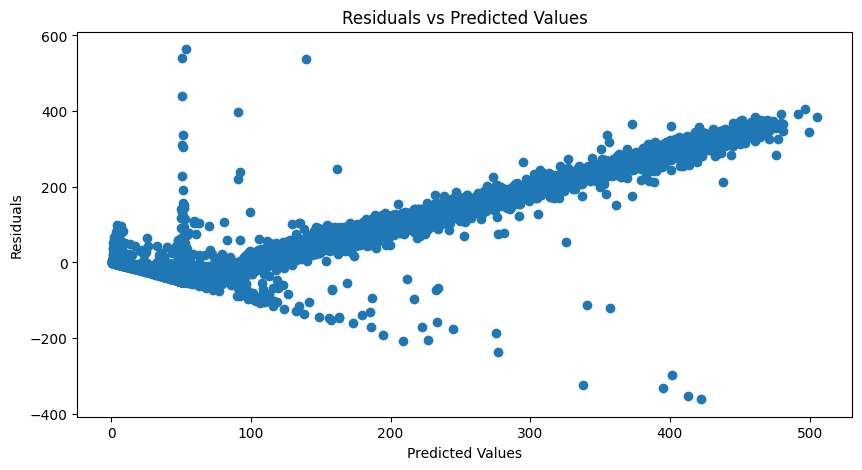

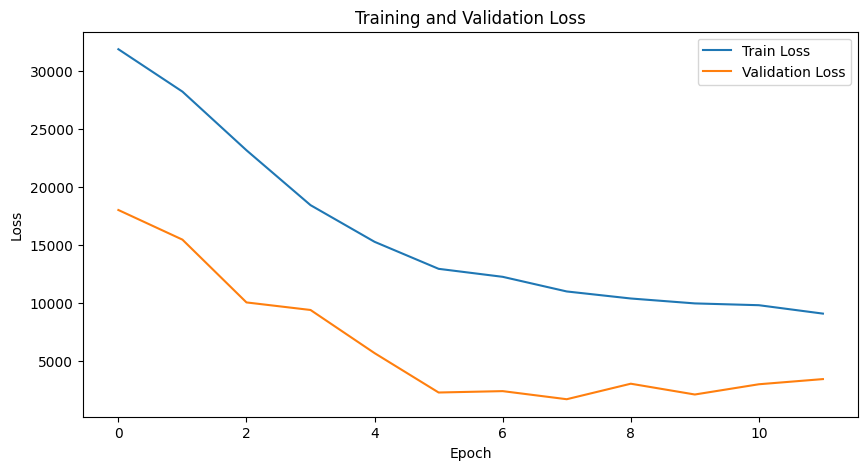

In [20]:
### NODE unscaled data 23.05.2024 +++++

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Use a subset of the training data for faster training
subset_fraction = 0.01  # Adjust this fraction as needed
train_features_subset, _, train_target_subset, _ = train_test_split(
    train_features, train_target, train_size=subset_fraction, random_state=42
)

print("Subset Train Features Shape:", train_features_subset.shape)
print("Subset Train Target Shape:", train_target_subset.shape)

# Prepare the data loaders
batch_size = 64

train_dataset = TensorDataset(torch.tensor(train_features_subset.values, dtype=torch.float32), 
                              torch.tensor(train_target_subset.values, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(torch.tensor(test_features.values, dtype=torch.float32), 
                             torch.tensor(test_target.values, dtype=torch.float32))
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the NODE model
class NODE(nn.Module):
    def __init__(self, input_dim):
        super(NODE, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.fc4 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(p=0.5)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.relu(self.bn3(self.fc3(x)))
        x = self.fc4(x)
        return x

# Define the model, loss function, and optimizer
input_dim = train_features_subset.shape[1]
model = NODE(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 12
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for inputs, targets in train_loader:
        targets = targets.view(-1, 1)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        running_train_loss += loss.item()
    
    train_loss = running_train_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Validation
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            targets = targets.view(-1, 1)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_val_loss += loss.item()
    
    val_loss = running_val_loss / len(test_loader)
    val_losses.append(val_loss)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    test_predictions = []
    test_targets = []
    for inputs, targets in test_loader:
        outputs = model(inputs)
        test_predictions.extend(outputs.numpy())
        test_targets.extend(targets.numpy())

# Calculate RMSE for the test set
rmse_test = np.sqrt(mean_squared_error(test_targets, test_predictions))
print(f"RMSE on test data: {rmse_test}")

# Plot the first 200 predictions along with the corresponding test target values
print("First 200 Predictions and Respective Test Target Values:")
for i in range(200):
    print(f"Predicted: {test_predictions[i][0]}, Actual: {test_targets[i]}")

# Plot residuals
residuals = np.array(test_targets).reshape(-1, 1) - np.array(test_predictions).reshape(-1, 1)
plt.figure(figsize=(10, 5))
plt.scatter(test_predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()



Subset Train Features Shape (scaled): (12038, 40)
Subset Train Target Shape (scaled): (12038, 1)
Epoch [1/5], Train Loss: 0.0149, Validation Loss: 0.0006
Epoch [2/5], Train Loss: 0.0020, Validation Loss: 0.0002
Epoch [3/5], Train Loss: 0.0010, Validation Loss: 0.0002
Epoch [4/5], Train Loss: 0.0006, Validation Loss: 0.0002
Epoch [5/5], Train Loss: 0.0005, Validation Loss: 0.0001
RMSE on test data (scaled): 0.011100511066615582
RMSE on test data (original scale): 54.39228766341359
First 200 Predictions and Respective Test Target Values (original scale):
Predicted: 113.69047151878475, Actual: 63.39999778654426
Predicted: 84.57801178969441, Actual: 63.19999950140715
Predicted: 46.28514430776239, Actual: 60.59999897731468
Predicted: 71.06195007018745, Actual: 62.000000663660465
Predicted: 80.80017716273665, Actual: 62.199998948797585
Predicted: 73.31985979318618, Actual: 61.19999839618802
Predicted: 70.6247339039296, Actual: 61.40000124478713
Predicted: 83.44043198503553, Actual: 62.000000

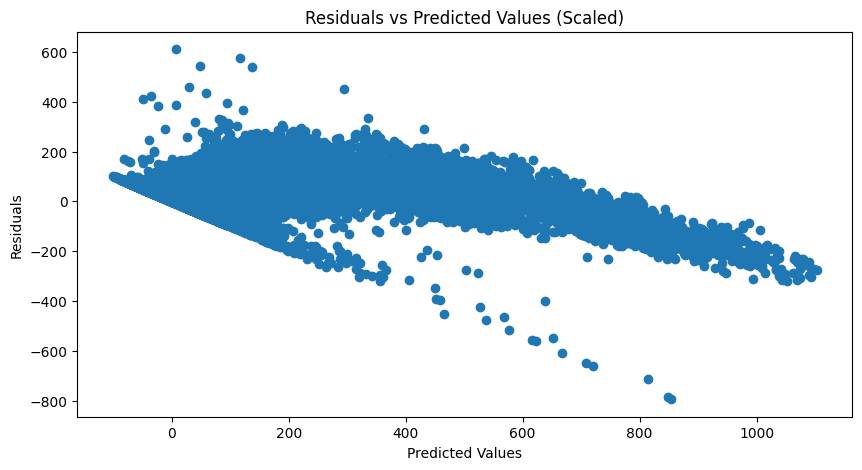

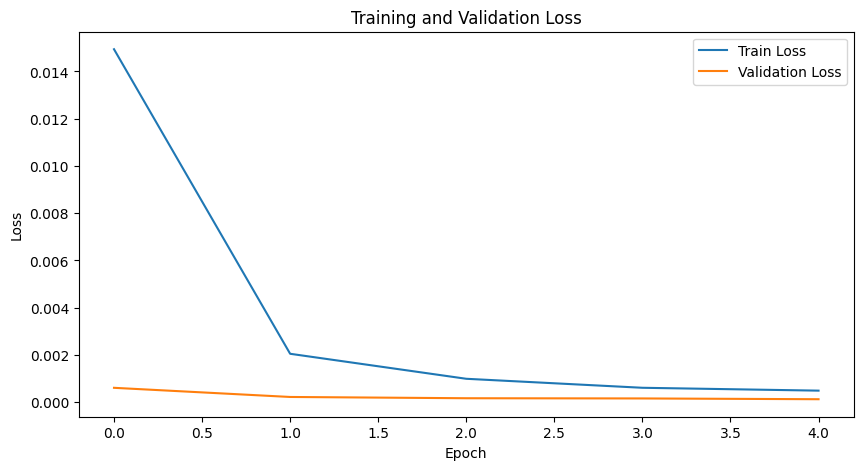

In [21]:
### NODE Model with Scaled Data 23.05.2024 ++++++++++++ ++javab be nesbat manteghi 
 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Scale the features and target using MinMaxScaler
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

train_features_scaled = scaler_features.fit_transform(train_features)
test_features_scaled = scaler_features.transform(test_features)

train_target_scaled = scaler_target.fit_transform(train_target.values.reshape(-1, 1))
test_target_scaled = scaler_target.transform(test_target.values.reshape(-1, 1))

# Use a subset of the training data for faster training
subset_fraction = 0.01  # Adjust this fraction as needed
train_features_subset, _, train_target_subset, _ = train_test_split(
    train_features_scaled, train_target_scaled, train_size=subset_fraction, random_state=42
)

print("Subset Train Features Shape (scaled):", train_features_subset.shape)
print("Subset Train Target Shape (scaled):", train_target_subset.shape)

# Prepare the data loaders
batch_size = 64

train_dataset = TensorDataset(torch.tensor(train_features_subset, dtype=torch.float32), 
                              torch.tensor(train_target_subset, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(torch.tensor(test_features_scaled, dtype=torch.float32), 
                             torch.tensor(test_target_scaled, dtype=torch.float32))
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the NODE model
class NODE(nn.Module):
    def __init__(self, input_dim):
        super(NODE, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.fc4 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(p=0.5)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.relu(self.bn3(self.fc3(x)))
        x = self.fc4(x)
        return x

# Define the model, loss function, and optimizer
input_dim = train_features_subset.shape[1]
model = NODE(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 5
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for inputs, targets in train_loader:
        targets = targets.view(-1, 1)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        running_train_loss += loss.item()
    
    train_loss = running_train_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Validation
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            targets = targets.view(-1, 1)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_val_loss += loss.item()
    
    val_loss = running_val_loss / len(test_loader)
    val_losses.append(val_loss)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    test_predictions = []
    test_targets = []
    for inputs, targets in test_loader:
        outputs = model(inputs)
        test_predictions.extend(outputs.numpy())
        test_targets.extend(targets.numpy())

# Calculate RMSE in the scaled state
rmse_scaled = np.sqrt(mean_squared_error(test_targets, test_predictions))
print(f"RMSE on test data (scaled): {rmse_scaled}")

# Inverse transform the predictions and targets to original scale
test_predictions_inverse = scaler_target.inverse_transform(test_predictions)
test_targets_inverse = scaler_target.inverse_transform(test_targets)

# Calculate RMSE for the test set in the original scale
rmse_original = np.sqrt(mean_squared_error(test_targets_inverse, test_predictions_inverse))
print(f"RMSE on test data (original scale): {rmse_original}")

# Plot the first 200 predictions along with the corresponding test target values
print("First 200 Predictions and Respective Test Target Values (original scale):")
for i in range(200):
    print(f"Predicted: {test_predictions_inverse[i][0]}, Actual: {test_targets_inverse[i][0]}")

# Plot residuals
residuals_scaled = np.array(test_targets_inverse).reshape(-1, 1) - np.array(test_predictions_inverse).reshape(-1, 1)
plt.figure(figsize=(10, 5))
plt.scatter(test_predictions_inverse, residuals_scaled)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Scaled)')
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


Subset Train Features Shape: (1191817, 40)
Subset Train Target Shape: (1191817,)
Epoch [1/10], Train Loss: 30519504569423676.0000, Validation Loss: 276246673699.2925
Epoch [2/10], Train Loss: 417750771590428.7500, Validation Loss: 24152149250.1884
Epoch [3/10], Train Loss: 2645302183261973.5000, Validation Loss: 26726300223.4817
Epoch [4/10], Train Loss: 45581983869418.4922, Validation Loss: 2437619418.0107
Epoch [5/10], Train Loss: 23002375467042.0508, Validation Loss: 15493185692.5268
Epoch [6/10], Train Loss: 15817848634658.6484, Validation Loss: 2483920396.4676
Epoch [7/10], Train Loss: 36941623058014.3281, Validation Loss: 6031990761.9971
Epoch [8/10], Train Loss: 379115393442.8004, Validation Loss: 14692156439.2195
Epoch [9/10], Train Loss: 11013652350.9266, Validation Loss: 564442269.3004
Epoch [10/10], Train Loss: 3050001700558.5693, Validation Loss: 134170325.7591
RMSE on test data: 11585.283203125
First 200 Predictions and Respective Test Target Values:
Predicted: 1.440092086

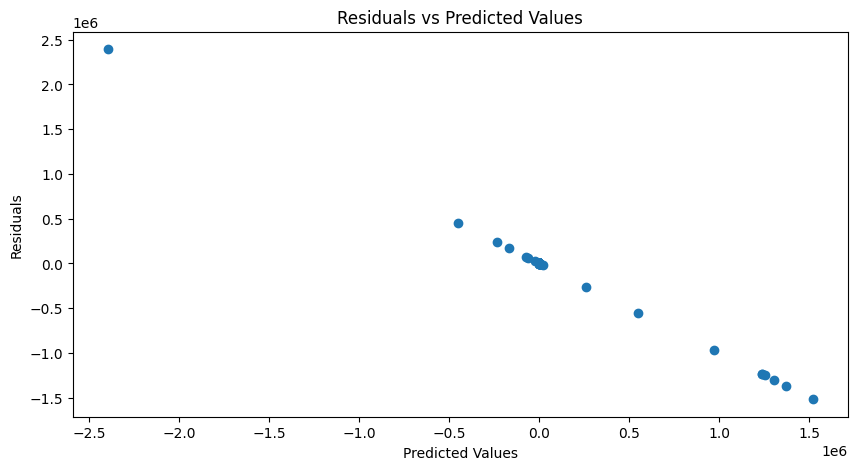

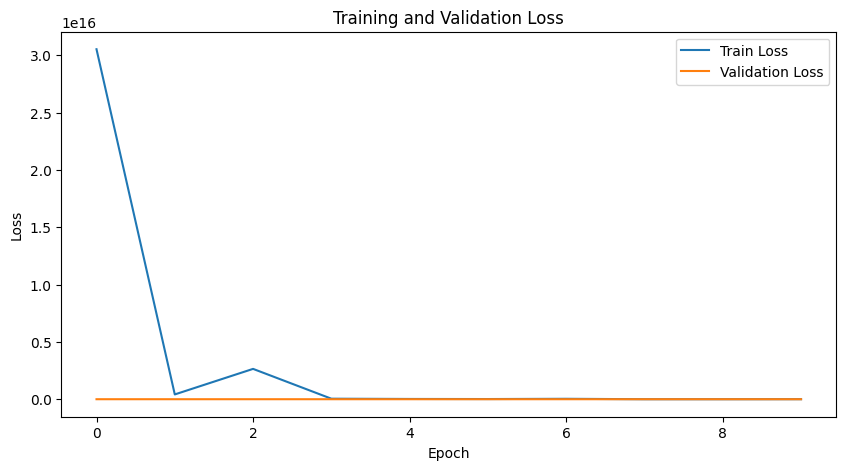

In [27]:
##### DCN v2 paralell unscaled  23.05.2024  -----??? dcn v2 parallel khoob nabood >> ehtemalan ham ful data ham epoch bala 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Use a subset of the training data for faster training
subset_fraction = 0.99# Adjust this fraction as needed
train_features_subset, _, train_target_subset, _ = train_test_split(
    train_features, train_target, train_size=subset_fraction, random_state=42
)

print("Subset Train Features Shape:", train_features_subset.shape)
print("Subset Train Target Shape:", train_target_subset.shape)

# Prepare the data loaders
batch_size = 64

train_dataset = TensorDataset(torch.tensor(train_features_subset.values, dtype=torch.float32), 
                              torch.tensor(train_target_subset.values, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(torch.tensor(test_features.values, dtype=torch.float32), 
                             torch.tensor(test_target.values, dtype=torch.float32))
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the DCN v2 Parallel model
class DCNv2Parallel(nn.Module):
    def __init__(self, input_dim, num_layers=3, layer_dim=128):
        super(DCNv2Parallel, self).__init__()
        self.num_layers = num_layers
        self.cross_layers = nn.ModuleList([nn.Linear(input_dim, input_dim) for _ in range(num_layers)])
        self.dense_layers = nn.Sequential(
            nn.Linear(input_dim, layer_dim),
            nn.ReLU(),
            nn.Linear(layer_dim, layer_dim),
            nn.ReLU()
        )
        self.final_layers = nn.Sequential(
            nn.Linear(input_dim + layer_dim, layer_dim),
            nn.ReLU(),
            nn.Linear(layer_dim, 1)
        )

    def forward(self, x):
        x0 = x
        for i in range(self.num_layers):
            xl = self.cross_layers[i](x)
            x = x0 * xl + x
        x_cross = x
        x_dense = self.dense_layers(x0)
        x_concat = torch.cat([x_cross, x_dense], dim=1)
        x_out = self.final_layers(x_concat)
        return x_out

# Define the model, loss function, and optimizer
input_dim = train_features_subset.shape[1]
model = DCNv2Parallel(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 10
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for inputs, targets in train_loader:
        targets = targets.view(-1, 1)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        running_train_loss += loss.item()
    
    train_loss = running_train_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Validation
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            targets = targets.view(-1, 1)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_val_loss += loss.item()
    
    val_loss = running_val_loss / len(test_loader)
    val_losses.append(val_loss)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    test_predictions = []
    test_targets = []
    for inputs, targets in test_loader:
        outputs = model(inputs)
        test_predictions.extend(outputs.numpy())
        test_targets.extend(targets.numpy())

# Calculate RMSE for the test set
rmse_test = np.sqrt(mean_squared_error(test_targets, test_predictions))
print(f"RMSE on test data: {rmse_test}")

# Plot the first 200 predictions along with the corresponding test target values
print("First 200 Predictions and Respective Test Target Values:")
for i in range(200):
    print(f"Predicted: {test_predictions[i][0]}, Actual: {test_targets[i]}")

# Plot residuals
residuals = np.array(test_targets).reshape(-1, 1) - np.array(test_predictions).reshape(-1, 1)
plt.figure(figsize=(10, 5))
plt.scatter(test_predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()



Subset Train Features Shape (scaled): (361156, 40)
Subset Train Target Shape (scaled): (361156, 1)
Epoch [1/5], Train Loss: 0.0000, Validation Loss: 0.0000
Epoch [2/5], Train Loss: 0.0000, Validation Loss: 0.0000
Epoch [3/5], Train Loss: 0.0000, Validation Loss: 0.0000
Epoch [4/5], Train Loss: 0.0000, Validation Loss: 0.0000
Epoch [5/5], Train Loss: 0.0000, Validation Loss: 0.0000
RMSE on test data (scaled): 0.002874666126444936
RMSE on test data (original scale): 14.085806174028573
First 200 Predictions and Respective Test Target Values (original scale):
Predicted: 64.17603275164961, Actual: 63.39999778654426
Predicted: 62.22097262009978, Actual: 63.19999950140715
Predicted: 62.51630162619054, Actual: 60.59999897731468
Predicted: 60.33061781609431, Actual: 62.000000663660465
Predicted: 61.82728275429457, Actual: 62.199998948797585
Predicted: 61.829628373757004, Actual: 61.19999839618802
Predicted: 60.73880580063909, Actual: 61.40000124478713
Predicted: 60.7471843168512, Actual: 62.000

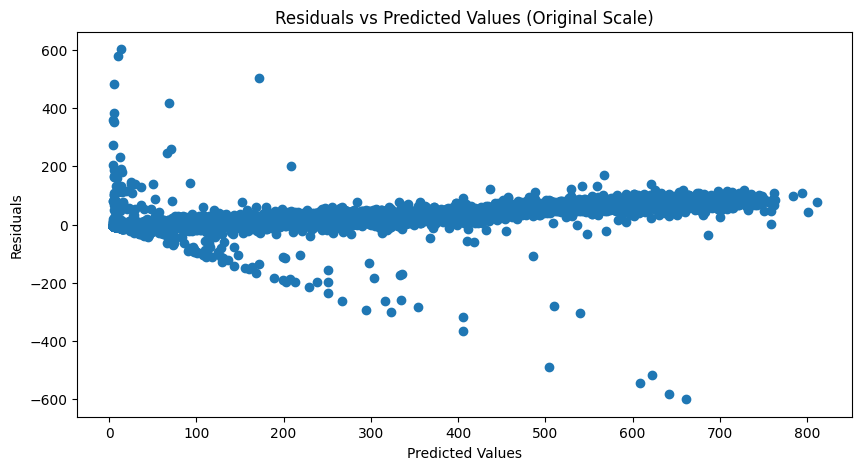

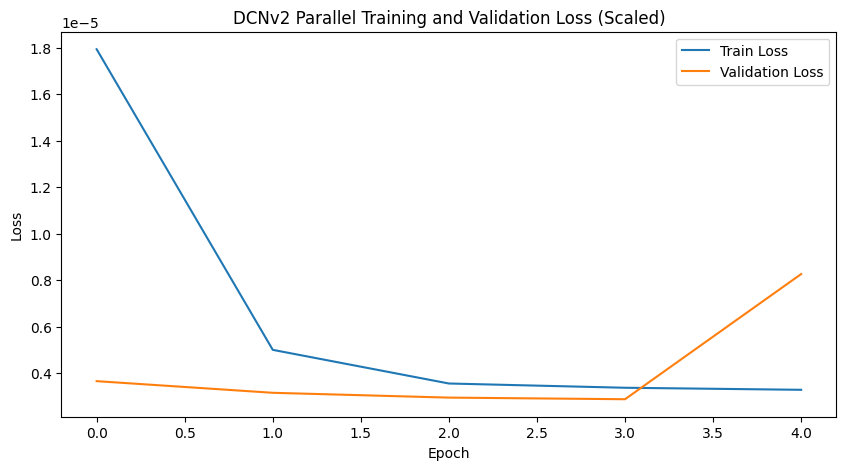

In [28]:
### DCN v2 scaled 23.05.2024  +++++++++ natyje khoob vali ajib !!!!!!!!!!!!!



import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Scale the features and target using MinMaxScaler
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

train_features_scaled = scaler_features.fit_transform(train_features)
test_features_scaled = scaler_features.transform(test_features)

train_target_scaled = scaler_target.fit_transform(train_target.values.reshape(-1, 1))
test_target_scaled = scaler_target.transform(test_target.values.reshape(-1, 1))

# Use a subset of the training data for faster training
subset_fraction = 0.3  # Adjust this fraction as needed
train_features_subset, _, train_target_subset, _ = train_test_split(
    train_features_scaled, train_target_scaled, train_size=subset_fraction, random_state=42
)

print("Subset Train Features Shape (scaled):", train_features_subset.shape)
print("Subset Train Target Shape (scaled):", train_target_subset.shape)

# Prepare the data loaders
batch_size = 64

train_dataset = TensorDataset(torch.tensor(train_features_subset, dtype=torch.float32), 
                              torch.tensor(train_target_subset, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(torch.tensor(test_features_scaled, dtype=torch.float32), 
                             torch.tensor(test_target_scaled, dtype=torch.float32))
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the DCN v2 Parallel model
class DCNv2Parallel(nn.Module):
    def __init__(self, input_dim, num_layers=3, layer_dim=128):
        super(DCNv2Parallel, self).__init__()
        self.num_layers = num_layers
        self.cross_layers = nn.ModuleList([nn.Linear(input_dim, input_dim) for _ in range(num_layers)])
        self.dense_layers = nn.Sequential(
            nn.Linear(input_dim, layer_dim),
            nn.ReLU(),
            nn.Linear(layer_dim, layer_dim),
            nn.ReLU()
        )
        self.final_layers = nn.Sequential(
            nn.Linear(input_dim + layer_dim, layer_dim),
            nn.ReLU(),
            nn.Linear(layer_dim, 1)
        )

    def forward(self, x):
        x0 = x
        for i in range(self.num_layers):
            xl = self.cross_layers[i](x)
            x = x0 * xl + x
        x_cross = x
        x_dense = self.dense_layers(x0)
        x_concat = torch.cat([x_cross, x_dense], dim=1)
        x_out = self.final_layers(x_concat)
        return x_out

# Define the model, loss function, and optimizer
input_dim = train_features_subset.shape[1]
model = DCNv2Parallel(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 5
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for inputs, targets in train_loader:
        targets = targets.view(-1, 1)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        running_train_loss += loss.item()
    
    train_loss = running_train_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Validation
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            targets = targets.view(-1, 1)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_val_loss += loss.item()
    
    val_loss = running_val_loss / len(test_loader)
    val_losses.append(val_loss)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    test_predictions = []
    test_targets = []
    for inputs, targets in test_loader:
        outputs = model(inputs)
        test_predictions.extend(outputs.numpy())
        test_targets.extend(targets.numpy())

# Calculate RMSE in the scaled state
rmse_scaled = np.sqrt(mean_squared_error(test_targets, test_predictions))
print(f"RMSE on test data (scaled): {rmse_scaled}")

# Inverse transform the predictions and targets to original scale
test_predictions_inverse = scaler_target.inverse_transform(test_predictions)
test_targets_inverse = scaler_target.inverse_transform(test_targets)

# Calculate RMSE for the test set in the original scale
rmse_original = np.sqrt(mean_squared_error(test_targets_inverse, test_predictions_inverse))
print(f"RMSE on test data (original scale): {rmse_original}")

# Plot the first 200 predictions along with the corresponding test target values
print("First 200 Predictions and Respective Test Target Values (original scale):")
for i in range(200):
    print(f"Predicted: {test_predictions_inverse[i][0]}, Actual: {test_targets_inverse[i][0]}")

# Plot residuals
residuals_scaled = test_targets_inverse - test_predictions_inverse
plt.figure(figsize=(10, 5))
plt.scatter(test_predictions_inverse, residuals_scaled)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Original Scale)')
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('DCNv2 Parallel Training and Validation Loss (Scaled)')
plt.legend()
plt.show()


Subset Train Features Shape: (12038, 40)
Subset Train Target Shape: (12038,)
Epoch [1/50], Train Loss: 33367.9175, Validation Loss: 19082.1719
Epoch [2/50], Train Loss: 32443.8694, Validation Loss: 17779.2059
Epoch [3/50], Train Loss: 31209.9555, Validation Loss: 16196.6693
Epoch [4/50], Train Loss: 29820.2305, Validation Loss: 14501.7687
Epoch [5/50], Train Loss: 28434.5734, Validation Loss: 13187.0459
Epoch [6/50], Train Loss: 27144.3450, Validation Loss: 11657.2071
Epoch [7/50], Train Loss: 26015.0053, Validation Loss: 16481.4751
Epoch [8/50], Train Loss: 24924.2285, Validation Loss: 14595.2408
Epoch [9/50], Train Loss: 24011.5302, Validation Loss: 16253.0060
Epoch [10/50], Train Loss: 23262.5908, Validation Loss: 17285.1214
Epoch [11/50], Train Loss: 22423.0212, Validation Loss: 16455.0580
Epoch [12/50], Train Loss: 21813.5987, Validation Loss: 16608.4012
Epoch [13/50], Train Loss: 21231.6062, Validation Loss: 16014.2545
Epoch [14/50], Train Loss: 20763.6317, Validation Loss: 12855

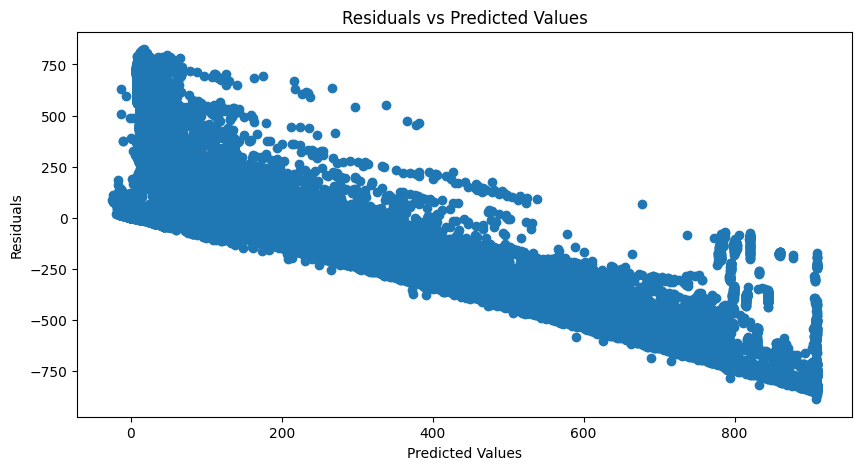

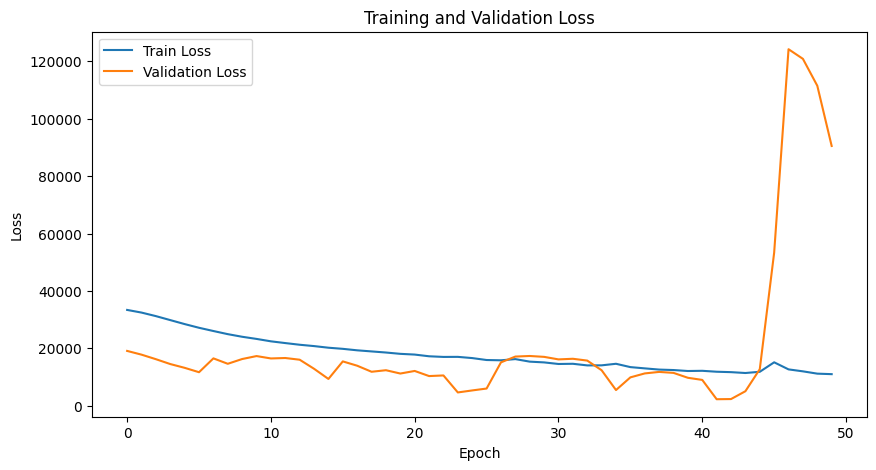

In [29]:
#autoint selfmade model unscaled avali ??? --- not good that  MUCH 


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Use a subset of the training data for faster training
subset_fraction = 0.01  # Adjust this fraction as needed
train_features_subset, _, train_target_subset, _ = train_test_split(
    train_features, train_target, train_size=subset_fraction, random_state=42
)

print("Subset Train Features Shape:", train_features_subset.shape)
print("Subset Train Target Shape:", train_target_subset.shape)

# Prepare the data loaders
batch_size = 64

train_dataset = TensorDataset(torch.tensor(train_features_subset.values, dtype=torch.float32), 
                              torch.tensor(train_target_subset.values, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(torch.tensor(test_features.values, dtype=torch.float32), 
                             torch.tensor(test_target.values, dtype=torch.float32))
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the AutoInt model
class AutoInt(nn.Module):
    def __init__(self, input_dim, num_layers=3, feature_embed_size=16, residual_dropout=0.1, attention_dropout=0.1):
        super(AutoInt, self).__init__()
        self.input_dim = input_dim
        self.feature_embed_size = feature_embed_size
        
        self.embedding = nn.Linear(input_dim, feature_embed_size)
        self.transformer_layers = nn.ModuleList([nn.TransformerEncoderLayer(
            d_model=feature_embed_size, nhead=4, dropout=attention_dropout) for _ in range(num_layers)])
        self.dropout = nn.Dropout(residual_dropout)
        self.fc = nn.Linear(feature_embed_size, 1)
        
    def forward(self, x):
        x = self.embedding(x).unsqueeze(1)  # Add sequence dimension
        for layer in self.transformer_layers:
            x = layer(x)
        x = self.dropout(x.squeeze(1))  # Remove sequence dimension
        x = self.fc(x)
        return x

# Define the model, loss function, and optimizer
input_dim = train_features_subset.shape[1]
model = AutoInt(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# Training the model
num_epochs = 50
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for inputs, targets in train_loader:
        targets = targets.view(-1, 1)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        running_train_loss += loss.item()
    
    train_loss = running_train_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Validation
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            targets = targets.view(-1, 1)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_val_loss += loss.item()
    
    val_loss = running_val_loss / len(test_loader)
    val_losses.append(val_loss)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    test_predictions = []
    test_targets = []
    for inputs, targets in test_loader:
        outputs = model(inputs)
        test_predictions.extend(outputs.numpy())
        test_targets.extend(targets.numpy())

# Calculate RMSE for the test set
rmse_test = np.sqrt(mean_squared_error(test_targets, test_predictions))
print(f"RMSE on test data: {rmse_test}")

# Plot the first 200 predictions along with the corresponding test target values
print("First 200 Predictions and Respective Test Target Values:")
for i in range(200):
    print(f"Predicted: {test_predictions[i][0]}, Actual: {test_targets[i]}")

# Plot residuals
residuals = np.array(test_targets).reshape(-1, 1) - np.array(test_predictions).reshape(-1, 1)
plt.figure(figsize=(10, 5))
plt.scatter(test_predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()




Subset Train Features Shape: (12038, 40)
Subset Train Target Shape: (12038,)
Epoch [1/10], Train Loss: 7016.7780, Validation Loss: 177.0613
Epoch [2/10], Train Loss: 1889.6489, Validation Loss: 192.0532
Epoch [3/10], Train Loss: 1192.5572, Validation Loss: 122.7086
Epoch [4/10], Train Loss: 898.8691, Validation Loss: 125.6771
Epoch [5/10], Train Loss: 698.0730, Validation Loss: 101.5350
Epoch [6/10], Train Loss: 530.0391, Validation Loss: 94.7390
Epoch [7/10], Train Loss: 270.8189, Validation Loss: 91.3117
Epoch [8/10], Train Loss: 337.1453, Validation Loss: 106.6919
Epoch [9/10], Train Loss: 324.6361, Validation Loss: 109.8587
Epoch [10/10], Train Loss: 202.7779, Validation Loss: 192.7197
RMSE on test data: 13.884737968444824
First 200 Predictions and Respective Test Target Values:
Predicted: 72.00297546386719, Actual: 63.400001525878906
Predicted: 69.21395874023438, Actual: 63.20000076293945
Predicted: 67.5202407836914, Actual: 60.599998474121094
Predicted: 66.16407775878906, Actual:

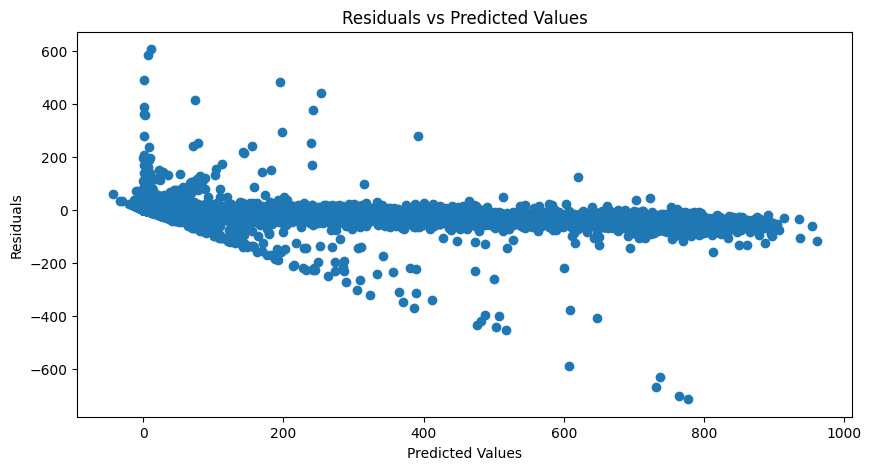

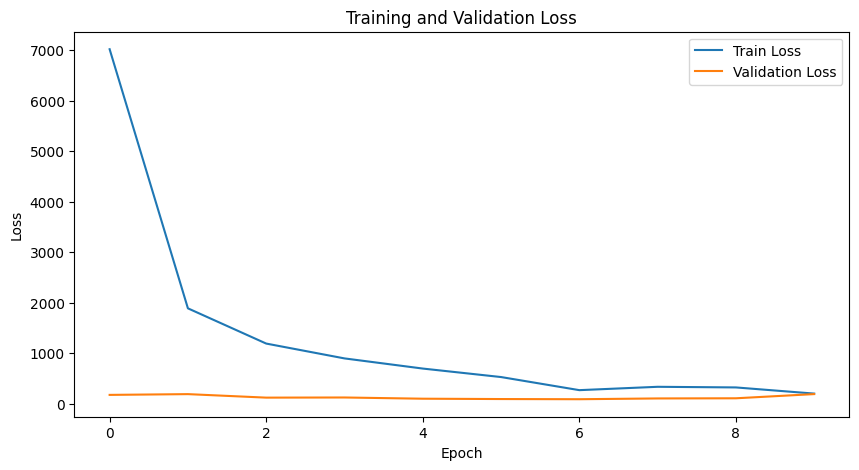

In [32]:
#### autoint unscale better model  23.05.2024++++++++++++++++ good results inetersting 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Use a subset of the training data for faster training
subset_fraction = 0.01  # Adjust this fraction as needed
train_features_subset, _, train_target_subset, _ = train_test_split(
    train_features, train_target, train_size=subset_fraction, random_state=42
)

print("Subset Train Features Shape:", train_features_subset.shape)
print("Subset Train Target Shape:", train_target_subset.shape)

# Prepare the data loaders
batch_size = 64

train_dataset = TensorDataset(torch.tensor(train_features_subset.values, dtype=torch.float32), 
                              torch.tensor(train_target_subset.values, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(torch.tensor(test_features.values, dtype=torch.float32), 
                             torch.tensor(test_target.values, dtype=torch.float32))
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the AutoInt model
class AutoInt(nn.Module):
    def __init__(self, input_dim, num_layers=3, feature_embed_size=16, residual_dropout=0.1, attention_dropout=0.1):
        super(AutoInt, self).__init__()
        self.input_dim = input_dim
        self.feature_embed_size = feature_embed_size

        self.embedding = nn.Linear(input_dim, feature_embed_size)
        self.attention_layers = nn.ModuleList([nn.MultiheadAttention(
            embed_dim=feature_embed_size, num_heads=4, dropout=attention_dropout) for _ in range(num_layers)])
        self.residual_dropout = nn.Dropout(residual_dropout)
        self.fc = nn.Linear(feature_embed_size, 1)

    def forward(self, x):
        x = self.embedding(x)  # Project features to embedding space
        x = x.unsqueeze(1)  # Add sequence length dimension: (batch_size, 1, embed_dim)
        x = x.permute(1, 0, 2)  # Required shape for MultiheadAttention: (seq_len, batch_size, embed_dim)
        
        for attention_layer in self.attention_layers:
            attn_output, _ = attention_layer(x, x, x)
            x = x + self.residual_dropout(attn_output)  # Add & norm
            
        x = x.permute(1, 0, 2)  # Back to (batch_size, seq_len, embed_dim)
        x = x.mean(dim=1)  # Aggregate over sequence length
        x = self.fc(x)
        return x

# Define the model, loss function, and optimizer
input_dim = train_features_subset.shape[1]
model = AutoInt(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 10
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for inputs, targets in train_loader:
        targets = targets.view(-1, 1)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        running_train_loss += loss.item()
    
    train_loss = running_train_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Validation
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            targets = targets.view(-1, 1)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_val_loss += loss.item()
    
    val_loss = running_val_loss / len(test_loader)
    val_losses.append(val_loss)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    test_predictions = []
    test_targets = []
    for inputs, targets in test_loader:
        outputs = model(inputs)
        test_predictions.extend(outputs.numpy())
        test_targets.extend(targets.numpy())

# Calculate RMSE for the test set
rmse_test = np.sqrt(mean_squared_error(test_targets, test_predictions))
print(f"RMSE on test data: {rmse_test}")

# Plot the first 200 predictions along with the corresponding test target values
print("First 200 Predictions and Respective Test Target Values:")
for i in range(200):
    print(f"Predicted: {test_predictions[i][0]}, Actual: {test_targets[i]}")

# Plot residuals
residuals = np.array(test_targets).reshape(-1, 1) - np.array(test_predictions).reshape(-1, 1)
plt.figure(figsize=(10, 5))
plt.scatter(test_predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


Subset Train Features Shape (scaled): (12038, 40)
Subset Train Target Shape (scaled): (12038, 1)
Epoch [1/12], Train Loss: 0.0009, Validation Loss: 0.0000
Epoch [2/12], Train Loss: 0.0001, Validation Loss: 0.0000
Epoch [3/12], Train Loss: 0.0001, Validation Loss: 0.0000
Epoch [4/12], Train Loss: 0.0000, Validation Loss: 0.0000
Epoch [5/12], Train Loss: 0.0000, Validation Loss: 0.0000
Epoch [6/12], Train Loss: 0.0000, Validation Loss: 0.0000
Epoch [7/12], Train Loss: 0.0000, Validation Loss: 0.0000
Epoch [8/12], Train Loss: 0.0000, Validation Loss: 0.0000
Epoch [9/12], Train Loss: 0.0000, Validation Loss: 0.0000
Epoch [10/12], Train Loss: 0.0000, Validation Loss: 0.0000
Epoch [11/12], Train Loss: 0.0000, Validation Loss: 0.0000
Epoch [12/12], Train Loss: 0.0000, Validation Loss: 0.0000
RMSE on test data (scaled): 0.0021938257850706577
RMSE on test data (original scale): 10.749702978198846
First 200 Predictions and Respective Test Target Values (original scale):
Predicted: 69.85590008184

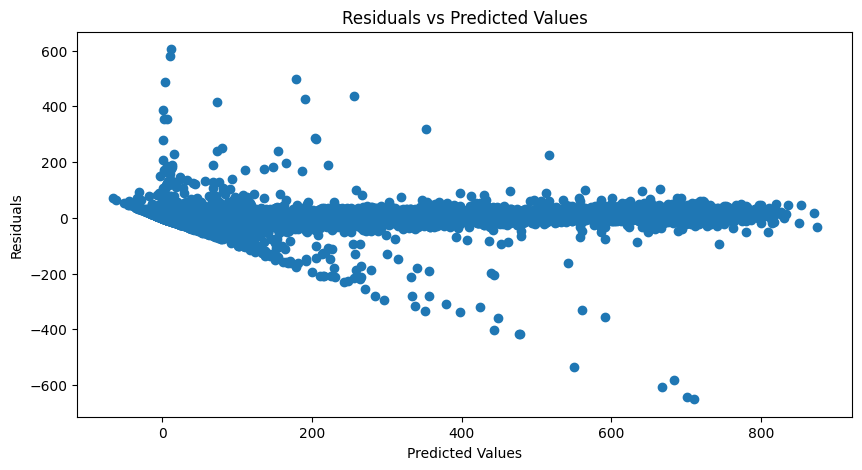

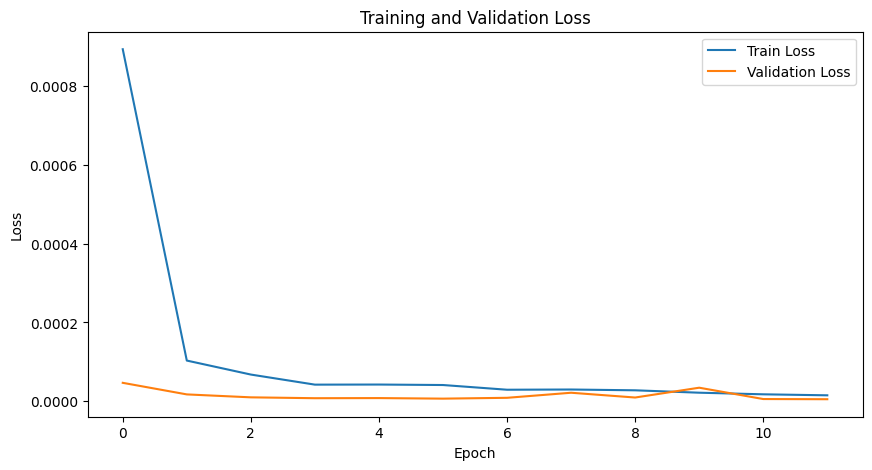

In [33]:
### auto int scaled 23.05.2024 ++++++++++++++++++++ best answer i think 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Scale the features and target using MinMaxScaler
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

train_features_scaled = scaler_features.fit_transform(train_features)
test_features_scaled = scaler_features.transform(test_features)

train_target_scaled = scaler_target.fit_transform(train_target.values.reshape(-1, 1))
test_target_scaled = scaler_target.transform(test_target.values.reshape(-1, 1))

# Use a subset of the training data for faster training
subset_fraction = 0.01  # Adjust this fraction as needed
train_features_subset, _, train_target_subset, _ = train_test_split(
    train_features_scaled, train_target_scaled, train_size=subset_fraction, random_state=42
)

print("Subset Train Features Shape (scaled):", train_features_subset.shape)
print("Subset Train Target Shape (scaled):", train_target_subset.shape)

# Prepare the data loaders
batch_size = 64

train_dataset = TensorDataset(torch.tensor(train_features_subset, dtype=torch.float32), 
                              torch.tensor(train_target_subset, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(torch.tensor(test_features_scaled, dtype=torch.float32), 
                             torch.tensor(test_target_scaled, dtype=torch.float32))
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the AutoInt model
class AutoInt(nn.Module):
    def __init__(self, input_dim, num_layers=3, feature_embed_size=16, residual_dropout=0.1, attention_dropout=0.1):
        super(AutoInt, self).__init__()
        self.input_dim = input_dim
        self.feature_embed_size = feature_embed_size

        self.embedding = nn.Linear(input_dim, feature_embed_size)
        self.attention_layers = nn.ModuleList([nn.MultiheadAttention(
            embed_dim=feature_embed_size, num_heads=4, dropout=attention_dropout) for _ in range(num_layers)])
        self.residual_dropout = nn.Dropout(residual_dropout)
        self.fc = nn.Linear(feature_embed_size, 1)

    def forward(self, x):
        x = self.embedding(x)  # Project features to embedding space
        x = x.unsqueeze(1)  # Add sequence length dimension: (batch_size, 1, embed_dim)
        x = x.permute(1, 0, 2)  # Required shape for MultiheadAttention: (seq_len, batch_size, embed_dim)
        
        for attention_layer in self.attention_layers:
            attn_output, _ = attention_layer(x, x, x)
            x = x + self.residual_dropout(attn_output)  # Add & norm
            
        x = x.permute(1, 0, 2)  # Back to (batch_size, seq_len, embed_dim)
        x = x.mean(dim=1)  # Aggregate over sequence length
        x = self.fc(x)
        return x

# Define the model, loss function, and optimizer
input_dim = train_features_subset.shape[1]
model = AutoInt(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 12
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for inputs, targets in train_loader:
        targets = targets.view(-1, 1)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        running_train_loss += loss.item()
    
    train_loss = running_train_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Validation
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            targets = targets.view(-1, 1)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_val_loss += loss.item()
    
    val_loss = running_val_loss / len(test_loader)
    val_losses.append(val_loss)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    test_predictions = []
    test_targets = []
    for inputs, targets in test_loader:
        outputs = model(inputs)
        test_predictions.extend(outputs.numpy())
        test_targets.extend(targets.numpy())

# Calculate RMSE in the scaled state
rmse_scaled = np.sqrt(mean_squared_error(test_targets, test_predictions))
print(f"RMSE on test data (scaled): {rmse_scaled}")

# Inverse transform the predictions and targets to original scale
test_predictions_inverse = scaler_target.inverse_transform(test_predictions)
test_targets_inverse = scaler_target.inverse_transform(test_targets)

# Calculate RMSE for the test set in the original scale
rmse_original = np.sqrt(mean_squared_error(test_targets_inverse, test_predictions_inverse))
print(f"RMSE on test data (original scale): {rmse_original}")

# Plot the first 200 predictions along with the corresponding test target values
print("First 200 Predictions and Respective Test Target Values (original scale):")
for i in range(200):
    print(f"Predicted: {test_predictions_inverse[i][0]}, Actual: {test_targets_inverse[i][0]}")

# Plot residuals
residuals = test_targets_inverse - test_predictions_inverse
plt.figure(figsize=(10, 5))
plt.scatter(test_predictions_inverse, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


c:\Users\a\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 23021.03767| val_0_mse: 2576.20945|  0:00:16s
epoch 1  | loss: 11179.08319| val_0_mse: 3338.83993|  0:00:34s
epoch 2  | loss: 9412.41164| val_0_mse: 1672.17297|  0:00:50s
Stop training because you reached max_epochs = 3 with best_epoch = 2 and best_val_0_mse = 1672.17297


c:\Users\a\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


RMSE on real data: 40.89221162433894
First 200 Predictions and Respective Test Target Values:
Predicted: [62.84224], Actual: [63.4]
Predicted: [67.83818], Actual: [63.2]
Predicted: [67.10829], Actual: [60.6]
Predicted: [63.690147], Actual: [62.]
Predicted: [60.8079], Actual: [62.2]
Predicted: [57.203056], Actual: [61.2]
Predicted: [53.00461], Actual: [61.4]
Predicted: [52.67163], Actual: [62.]
Predicted: [53.459305], Actual: [62.4]
Predicted: [53.60762], Actual: [63.]
Predicted: [53.47058], Actual: [63.4]
Predicted: [50.952736], Actual: [65.]
Predicted: [50.4216], Actual: [65.6]
Predicted: [52.803352], Actual: [64.4]
Predicted: [53.421104], Actual: [67.6]
Predicted: [54.563034], Actual: [69.6]
Predicted: [55.82391], Actual: [73.]
Predicted: [59.097157], Actual: [71.4]
Predicted: [64.59259], Actual: [69.2]
Predicted: [69.63989], Actual: [68.8]
Predicted: [71.22537], Actual: [68.6]
Predicted: [70.23773], Actual: [67.8]
Predicted: [68.95833], Actual: [68.4]
Predicted: [66.26325], Actual: 

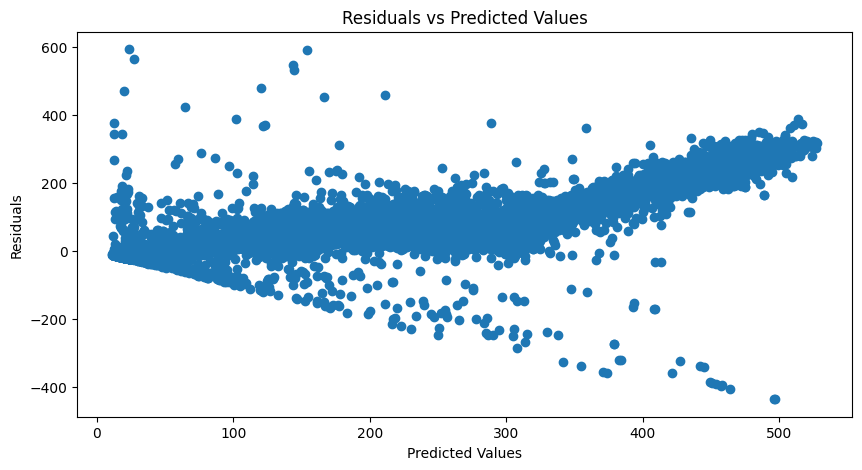

History: {'loss': [23021.037671028298, 11179.083186129308, 9412.411644915315], 'lr': [0.02, 0.02, 0.02], 'val_0_mse': [2576.209446815583, 3338.839927073901, 1672.172971529721]}


KeyError: 0

In [22]:
### javabash jalebee amma ???????????????---




import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.metrics import mean_squared_error

# Use a fraction of the training data
fraction = 0.01  # Adjust this fraction as needed
train_data_sampled = train_data.sample(frac=fraction, random_state=42)

# Prepare features and target for the sampled training data
train_features_sampled = train_data_sampled.drop(columns=['close'])
train_target_sampled = train_data_sampled['close']

# Reshape the targets to 2D
train_target_sampled = train_target_sampled.values.reshape(-1, 1)
test_target_reshaped = test_target.reshape(-1, 1)

# Train the TabNet model
tabnet = TabNetRegressor()

tabnet.fit(
    X_train=train_features_sampled.values, y_train=train_target_sampled,
    eval_set=[(test_features.values, test_target_reshaped)],
    max_epochs=3,
    patience=10,
    batch_size=64,
    virtual_batch_size=64
)

# Predict using the model
predictions = tabnet.predict(test_features.values)

# Calculate RMSE for real data
rmse_real = np.sqrt(mean_squared_error(test_target_reshaped, predictions))
print(f"RMSE on real data: {rmse_real}")

# Print the first 200 predictions along with the corresponding test target values
print("First 200 Predictions and Respective Test Target Values:")
for i in range(200):
    print(f"Predicted: {predictions[i]}, Actual: {test_target[i]}")

# Calculate residuals
residuals = test_target_reshaped - predictions

# Plot residuals
plt.figure(figsize=(10, 5))
plt.scatter(predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Inspect history
print("History:", tabnet.history)

# Extract training and validation losses
train_losses = [epoch['loss'] for epoch in tabnet.history]
val_losses = [epoch['val_0_rmse'] for epoch in tabnet.history if 'val_0_rmse' in epoch]
test_losses = [epoch['val_0_rmse'] for epoch in tabnet.history if 'val_0_rmse' in epoch]

# Plot the training, validation, and test loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
if val_losses:
    plt.plot(val_losses, label='Validation Loss')
else:
    print("Validation loss not found in history.")
if test_losses:
    plt.plot(test_losses, label='Test Loss')
else:
    print("Test loss not found in history.")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()
plt.show()


In [3]:


###?????8.05.2024 working to make it better final  fttransformer ????? javabash jalebe khoobe yani pishbiniha khili motefaveto ina bood 

import pyreadr

import pandas as pd
from sklearn.model_selection import train_test_split
from pytorch_tabular import TabularModel
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig
from pytorch_tabular.models.ft_transformer import FTTransformerConfig
 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
 
import torch


# Define the path to your data file
file_path = r'datatabnetwithpca.rdata'

# Load the data using pyreadr
result = pyreadr.read_r(file_path)

# Extract the DataFrame
df = result['data']
df =df.sample(frac=0.03, random_state=42) # Sample 10% of the data without replacement
# Select the first 1000 rows
#df = df.iloc[:1000]

# Define features and target
features = df.columns[:-1].tolist()  # All columns except the last one as features
target = df.columns[-1]  # The last column as the target

# Split the data into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)


from sklearn.preprocessing import MinMaxScaler, StandardScaler

#  MinMaxScaler  
scaler = MinMaxScaler()

# Fit on training data and transform both train and validation target data### just target data 
train_df['cnn_output'] = scaler.fit_transform(train_df[['cnn_output']])
val_df['cnn_output'] = scaler.transform(val_df[['cnn_output']])





# Configuration for the data
data_config = DataConfig(
    target=[target],  # target column name
    continuous_cols=features,  # feature column names
    categorical_cols=[]  # assuming no categorical columns
)

# Configuration for the FT Transformer Model
model_config = FTTransformerConfig(
    task="regression",
    learning_rate=0.001,
    head="LinearHead"
)

# Configuration for the training
trainer_config = TrainerConfig(
    auto_lr_find=True,
    batch_size=64,
    max_epochs=4,
    accelerator="auto",
    devices=-1,
    early_stopping=None  # Disable early stopping
)

# Optimizer configuration
optimizer_config = OptimizerConfig()

# Initialize the Tabular Model
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config
)




# Fit the model using the training and validation DataFrames directly
tabular_model.fit(train=train_df, validation=val_df)


# Predict using the model on the validation set
predictions = tabular_model.predict(val_df)

import numpy as np

# Reshape the predictions array before inverse transforming
predicted_vals_scaled = tabular_model.predict(val_df)
predictions = scaler.inverse_transform(np.array(predicted_vals_scaled).reshape(-1, 1))

# Display the first few predictions
print(predictions)

#
# Display the first few predictions
#print(predictions.head())


KeyError: 'data'

In [5]:
#### -???????????? model avaliya qable lag gerefetan vali natayej jaleb boode 

import pyreadr

import pandas as pd
from sklearn.model_selection import train_test_split
from pytorch_tabular import TabularModel
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig
from pytorch_tabular.models.ft_transformer import FTTransformerConfig
 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
 
import torch


# Define the path to your data file
file_path = r'C:\Users\a\Desktop\master thesis codez\datatabnetwithpca.rdata'

# Load the data using pyreadr
result = pyreadr.read_r(file_path)

# Extract the DataFrame
df = result['data']
df =df.sample(frac=0.03, random_state=42) # Sample 10% of the data without replacement
# Select the first 1000 rows
#df = df.iloc[:1000]

# Define features and target
features = df.columns[:-1].tolist()  # All columns except the last one as features
target = df.columns[-1]  # The last column as the target

# Split the data into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)


from sklearn.preprocessing import MinMaxScaler, StandardScaler

#  MinMaxScaler  
scaler = MinMaxScaler()

# Fit on training data and transform both train and validation target data### just target data 
train_df['cnn_output'] = scaler.fit_transform(train_df[['cnn_output']])
val_df['cnn_output'] = scaler.transform(val_df[['cnn_output']])





# Configuration for the data
data_config = DataConfig(
    target=[target],  # target column name
    continuous_cols=features,  # feature column names
    categorical_cols=[]  # assuming no categorical columns
)

# Configuration for the FT Transformer Model
model_config = FTTransformerConfig(
    task="regression",
    learning_rate=0.001,
    head="LinearHead"
)

# Configuration for the training
trainer_config = TrainerConfig(
    auto_lr_find=True,
    batch_size=64,
    max_epochs=1,
    accelerator="auto",
    devices=-1,
    early_stopping=None  # Disable early stopping
)

# Optimizer configuration
optimizer_config = OptimizerConfig()

# Initialize the Tabular Model
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config
)




# Fit the model using the training and validation DataFrames directly
tabular_model.fit(train=train_df, validation=val_df)

evaluate = tabular_model.evaluate(val_df)
# Predict using the model on the validation set
predictions = tabular_model.predict(val_df)

import numpy as np

# Reshape the predictions array before inverse transforming
predicted_vals_scaled = tabular_model.predict(val_df)
predictions = scaler.inverse_transform(np.array(predicted_vals_scaled).reshape(-1, 1))

# Display the first few predictions
print(predictions)

#
# Display the first few predictions
#print(predictions.head())


KeyError: 'data'

In [24]:
####?????????????????????????????????RSME #################### ++final 

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# Ensure 'predictions' is a DataFrame with the correct column for predictions.
# If 'predictions' is not a DataFrame, convert it appropriately.
if isinstance(predictions, pd.DataFrame):
    predicted_values = predictions['cnn_output_prediction'].values
else:
    predicted_values = predictions  # assuming 'predictions' is already an array

# Inverse transform both the predicted values and the actual target values
actual_values = scaler.inverse_transform(val_df['cnn_output'].values.reshape(-1, 1))
#predicted_values_scaled_back = scaler.inverse_transform(predicted_values.reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, predictions))
print(f"Root Mean Squared Error: {rmse}")

# Output the scaled back predictions for inspection
print("Scaled back predicted values:")
print(predictions)

# Output the actual values for comparison
print("Actual values:")
print(actual_values.flatten())


Root Mean Squared Error: 246.66212192365256
Scaled back predicted values:
[[159.25671 ]
 [ 88.49407 ]
 [163.59995 ]
 ...
 [ 71.71967 ]
 [115.042206]
 [188.16438 ]]
Actual values:
[125.    6.   87.  ...   5.2  73.8 138.4]


In [5]:


####RSME ####################++final ????????????????????????????????????

import numpy as np



actual_values = scaler.inverse_transform(val_df['cnn_output'].values.reshape(-1, 1))

# Assuming `val_df` is your validation DataFrame and contains the actual target values
#actual_values = val_df[target].values
#predicted_values = predictions['cnn_output_prediction'].values
predicted_values = predictions 
# Calculate RMSE
rmse = np.sqrt(np.mean((actual_values - predicted_values) ** 2))
print(f"Root Mean Squared Error: {rmse}")
#print(predictions['cnn_output_prediction'])## too objecte prediction e natayej 
print(predictions)## too objecte prediction e natayej 

print(val_df[target])
print(actual_values)

Root Mean Squared Error: 72.9180317197355
[[103.32229 ]
 [ 11.83937 ]
 [ 80.61529 ]
 ...
 [ 26.466774]
 [ 70.74512 ]
 [ 98.848335]]
962797     0.015430
675263     0.000738
971486     0.010738
94052      0.014195
775786     0.003899
             ...   
1264418    0.003479
100427     0.000281
315932     0.000640
374210     0.009109
426993     0.017084
Name: cnn_output, Length: 9085, dtype: float64
[[125. ]
 [  6. ]
 [ 87. ]
 ...
 [  5.2]
 [ 73.8]
 [138.4]]


In [6]:
#### normal distribution test over alll close prices 1.5k2 ### ba tavajoh be p value tozi normal nist +++++final?????????????

import pyreadr
import pandas as pd
from scipy.stats import shapiro, normaltest


# Define the path to your data file
file_path = r'datatabnetwithpca.rdata'

# Load the data using pyreadr
result = pyreadr.read_r(file_path)

# Extract the DataFrame
df = result['data']

# Extract the 'cnn_output' column
normtest = df['cnn_output']

# Perform Shapiro-Wilk Test
shapiro_test = shapiro(normtest)
print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

# Perform D'Agostino's K^2 Test
dagostino_test = normaltest(normtest)
print(f"D'Agostino's K^2 Test: Statistic={dagostino_test.statistic}, p-value={dagostino_test.pvalue}")


Shapiro-Wilk Test: Statistic=0.30261307211964383, p-value=9.50371422815031e-230
D'Agostino's K^2 Test: Statistic=2913555.2584248283, p-value=0.0


c:\Users\a\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1514047.
  res = hypotest_fun_out(*samples, **kwds)


In [6]:
###########            AUTO NET #########################


import pyreadr
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from pytorch_tabular import TabularModel
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig
from pytorch_tabular.models.autoint import AutoIntConfig
import matplotlib.pyplot as plt

# Define the path to your data file
file_path = r'datatabnetwithpca.rdata'

# Load the data using pyreadr
result = pyreadr.read_r(file_path)

# Extract the DataFrame
df = result['data']
df = df.sample(frac=0.1, random_state=42)  # Sample 3% of the data

# Define features and target
features = df.columns[:-1].tolist()  # All columns except the last one as features
target = df.columns[-1]  # The last column as the target

# Split the data into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Scale the target variable
scaler = MinMaxScaler()
train_df[target] = scaler.fit_transform(train_df[[target]])
val_df[target] = scaler.transform(val_df[[target]])

# Configuration for the data
data_config = DataConfig(
    target=[target],  # target column name
    continuous_cols=features,  # feature column names
    categorical_cols=[]  # assuming no categorical columns
)

# Configuration for the AutoInt Model
model_config = AutoIntConfig(
    task="regression",
    learning_rate=0.001,
    head="LinearHead"
)



from pytorch_lightning.callbacks import Callback

class MetricsLogger(Callback):
    def __init__(self):
        self.train_losses = []
        self.val_losses = []

    def on_validation_epoch_end(self, trainer, pl_module):
        # Log validation loss
        val_loss = trainer.callback_metrics['val_loss'].item()
        self.val_losses.append(val_loss)
        
    def on_train_epoch_end(self, trainer, pl_module, unused=None):
        # Log training loss, accessing the logged metrics for the last training step
        train_loss = trainer.callback_metrics['train_loss_epoch'].item()
        self.train_losses.append(train_loss)

# Initialize your callback
metrics_logger = MetricsLogger()

# Include   callback in the trainer configuration
trainer_config = TrainerConfig(
    auto_lr_find=True,
    batch_size=64,
    max_epochs=5,
    accelerator="auto",
    devices=-1,
    callbacks=[metrics_logger]  # Add your custom callback here
)



# Optimizer configuration
optimizer_config = OptimizerConfig()

# Initialize the Tabular Model
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config
)



tabular_model.fit(train=train_df, validation=val_df)

# Now you can access your logged metrics
print("Training Losses:", metrics_logger.train_losses)
print("Validation Losses:", metrics_logger.val_losses)

# Plotting the results
plt.plot(metrics_logger.train_losses, label='Training Loss')
plt.plot(metrics_logger.val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()



# Predict using the model on the validation set
predictions_scaled = tabular_model.predict(val_df)
predictions = scaler.inverse_transform(np.array(predictions_scaled).reshape(-1, 1))


# Calculate residuals
residuals = predictions.flatten() - val_df[target].values

# Plot residuals
plt.scatter(val_df[target].values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


TypeError: TrainerConfig.__init__() got an unexpected keyword argument 'callbacks'